### Abstract:  

It is very difficult to describe how songs have changed over time. Certain concepts, moods, or "vibes" have all been prescribed to detail the musical transformation of sounds over years or decades. However, there is no numerical or quantitative truth to such descriptions or criticisms. It becomes a real challenge for emerging artists to gauge trends and know what type of music to produce that will be well received, and it is almost equally difficult for listeners to dissect the audial makeup of the music they choose to listen to. 

This project analyzes a large quantity of songs on Spotify and the trends within their musical features. We aim to explore the prevalence of each feature in the music of the future, giving both artists and listeners a more quantitative understanding of where music and streaming is headed towards.

### Tools and libraries used:  

- Pandas
- Numpy
- Matplotlib + Seaborn
- Scikit-learn
- Plotly

### Datasets:  

This dataset consists of 10,000+ songs, along with their numerous musical characteristics gathered through Spotify API. Characteristics range from the objective (e.g. key, genre, release date) to the subjective (e.g. danceability, valence, energy). The dataset was extracted from Kaggle: https://www.kaggle.com/datasets/nicolasfierro/spotify-1986-2023

### Project outline:  

1. Abstract/Introduction
2. Data loading and preprocessing: Bringing raw data into the system + transforming the data for use, addressing errors and inconsistencies
3. Exploratory Data Analysis (EDA): Analyze the data and summarize its main characteristics - Distribution of data, patterns and relationships, hypotheses for further analysis
4. Data processing/Predictive modeling: Extract meaningful insights using classification, clustering, etc.
5. Conclusion

### Domain Knowledge  

Important features of the dataset are described below:
1. Track name
2. Track artist
3. Popularity: Score given from 0 to 100, calculated from number of streams and audience reception
4. Playlist Genre
5. Track release year
6. Track release decade
7. Duration (ms)
8. Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
9. Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
10. Key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
11. Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
12. Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
13. Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
14. Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
15. Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
16. Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
17. Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
18. Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


# Data Loading + Preprocessing

In [1]:
#import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import plotly.express as px

In [2]:
df=pd.read_csv('/kaggle/input/spotify-data-1986-2023/datos_merged_1986_2023.csv')
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'track_name', 'popularity',
       'available_markets', 'disc_number', 'duration_ms', 'explicit',
       'track_number', 'href', 'album_id', 'album_name', 'album_release_date',
       'album_type', 'album_total_tracks', 'artists_names', 'artists_ids',
       'principal_artist_id', 'principal_artist_name', 'artist_genres',
       'principal_artist_followers', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'year', 'duration_min'],
      dtype='object')


In [3]:
columns_to_drop=['Unnamed: 0.1', 'Unnamed: 0', 'track_id','disc_number','href','album_id','album_name','album_total_tracks','artists_ids','principal_artist_id','artists_names','principal_artist_followers']
df=df.drop(columns=columns_to_drop)
df

,track_name,popularity,available_markets,duration_ms,explicit,track_number,album_release_date,album_type,principal_artist_name,artist_genres,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,True Colors,73,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,227600,False,4,1986-10-14 00:00:00,album,Cyndi Lauper,dance pop;new wave pop;permanent wave;soft rock,...,0.0,0.1160,-13.155,1.0,0.0331,171.282,4.0,0.268,1986,3.793333
1,Paul Revere,61,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,220840,False,9,1986-11-15 00:00:00,album,Beastie Boys,alternative rock;east coast hip hop;golden age...,...,6.0,0.2280,-13.232,0.0,0.9440,91.753,4.0,0.578,1986,3.680667
2,Brass Monkey,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,157440,False,11,1986-11-15 00:00:00,album,Beastie Boys,alternative rock;east coast hip hop;golden age...,...,6.0,0.0992,-8.435,0.0,0.3300,116.371,4.0,0.655,1986,2.624000
3,Shot in the Dark,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,256293,False,9,1986-02-22 00:00:00,album,Ozzy Osbourne,album rock;alternative metal;birmingham metal;...,...,6.0,0.1420,-7.262,1.0,0.0324,123.887,3.0,0.619,1986,4.271550
4,Manic Monday,63,AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US,184160,False,1,1986-01-01 00:00:00,album,The Bangles,album rock;jangle pop;mellow gold;new romantic...,...,2.0,0.3580,-10.906,1.0,0.0289,121.761,4.0,0.853,1986,3.069333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,"Shakira: Bzrp Music Sessions, Vol. 53",89,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,214945,False,1,2023-01-11 00:00:00,single,Bizarrap,argentine hip hop;pop venezolano;trap argentin...,...,2.0,0.0915,-5.600,0.0,0.0493,122.104,4.0,0.498,2023,3.582417
11446,Las Morras,81,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,155550,True,1,2023-04-04 00:00:00,single,Peso Pluma,corridos tumbados;sad sierreno,...,9.0,0.0706,-4.641,0.0,0.0407,133.007,3.0,0.901,2023,2.592500
11447,The Painter,75,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,211413,False,1,2023-08-11 00:00:00,single,Cody Johnson,classic texas country;contemporary country,...,2.0,0.1070,-5.766,1.0,0.0329,97.981,4.0,0.261,2023,3.523550
11448,Red Ruby Da Sleeze,78,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,214445,True,1,2023-03-03 00:00:00,single,Nicki Minaj,hip pop;pop;queens hip hop;rap,...,1.0,0.1110,-6.181,1.0,0.2560,98.355,4.0,0.292,2023,3.574083


In [4]:
print("total rows:",df.shape[0])
print("total columns:",df.shape[1])

total rows: 11450
total columns: 25


In [5]:
missing_values = df.isnull().sum()
df = df.dropna()

duplicate_rows = df.duplicated()
df = df.drop_duplicates()

print("total rows:",df.shape[0])
print("total columns:",df.shape[1])

total rows: 11031
total columns: 25


In [6]:
df.info() #check for missing values in the dataset's column levels

<class 'pandas.core.frame.DataFrame'>
Index: 11031 entries, 0 to 11449
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   track_name             11031 non-null  object 
 1   popularity             11031 non-null  int64  
 2   available_markets      11031 non-null  object 
 3   duration_ms            11031 non-null  int64  
 4   explicit               11031 non-null  bool   
 5   track_number           11031 non-null  int64  
 6   album_release_date     11031 non-null  object 
 7   album_type             11031 non-null  object 
 8   principal_artist_name  11031 non-null  object 
 9   artist_genres          11031 non-null  object 
 10  acousticness           11031 non-null  float64
 11  analysis_url           11031 non-null  object 
 12  danceability           11031 non-null  float64
 13  energy                 11031 non-null  float64
 14  instrumentalness       11031 non-null  float64
 15  key    

In [7]:
df.describe()

,popularity,duration_ms,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
count,11031.000000,1.103100e+04,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000
mean,68.230170,2.290427e+05,5.282023,0.224462,0.612187,0.653684,0.044412,5.265524,0.183026,-7.459165,0.675823,0.088486,121.084775,3.931285,0.537304,2004.622065,3.817379
std,9.269915,6.418202e+04,4.433161,0.260775,0.160974,0.204845,0.162868,3.546138,0.145095,3.719165,0.468088,0.093838,30.063811,0.353446,0.244648,10.919666,1.069700
min,44.000000,3.349300e+04,1.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,-47.070000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000,0.558217
25%,61.000000,1.917395e+05,2.000000,0.018200,0.508000,0.520000,0.000000,2.000000,0.092400,-9.073000,0.000000,0.034000,96.950500,4.000000,0.346000,1995.000000,3.195658
50%,68.000000,2.230660e+05,4.000000,0.111000,0.622000,0.675000,0.000005,5.000000,0.125000,-6.662000,1.000000,0.047600,119.386000,4.000000,0.540000,2005.000000,3.717767
75%,75.000000,2.587875e+05,8.000000,0.358000,0.729000,0.815000,0.000630,8.000000,0.237000,-4.991000,1.000000,0.095150,140.068500,4.000000,0.734000,2014.000000,4.313125
max,100.000000,2.238733e+06,48.000000,0.996000,0.988000,1.000000,1.000000,11.000000,0.982000,0.522000,1.000000,0.944000,220.099000,5.000000,0.994000,2023.000000,37.312217


We look at the 5-point statistics for our data. Observing the mean and median (50%) values, it appears that many of our variables are approximately normal.

# Exploratory Data Analysis (EDA)

### Univariate Analysis

We can begin with a Q-Q plot to verify whether our variables do follow an approximately normal distribution:

<Figure size 800x500 with 0 Axes>

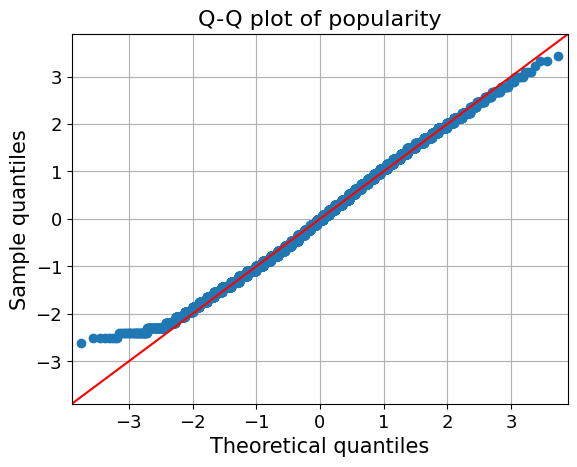

<Figure size 800x500 with 0 Axes>

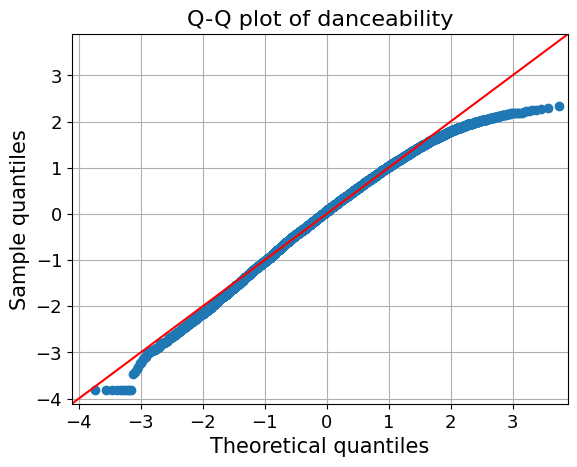

<Figure size 800x500 with 0 Axes>

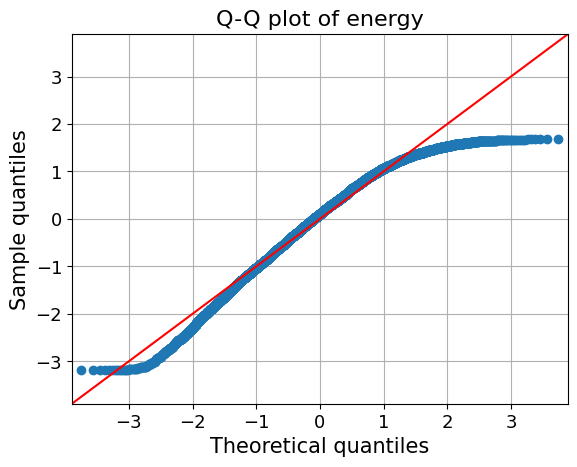

<Figure size 800x500 with 0 Axes>

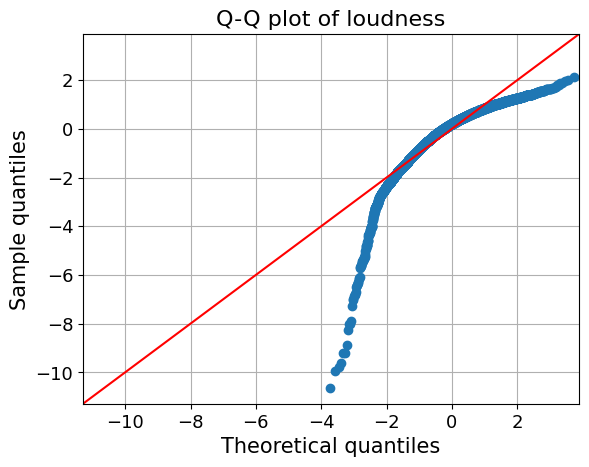

<Figure size 800x500 with 0 Axes>

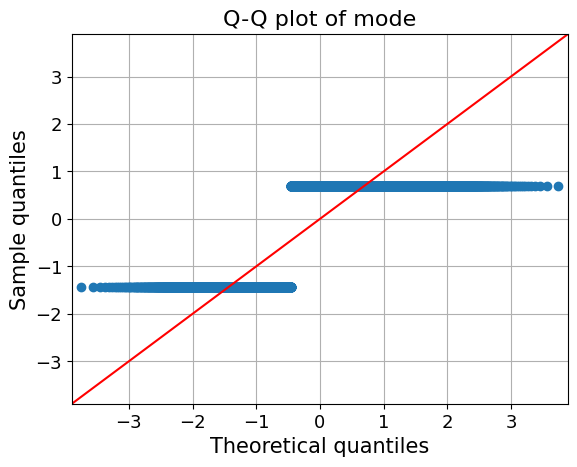

<Figure size 800x500 with 0 Axes>

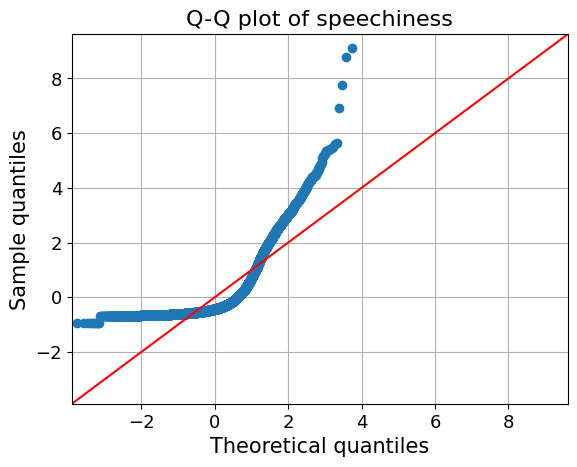

<Figure size 800x500 with 0 Axes>

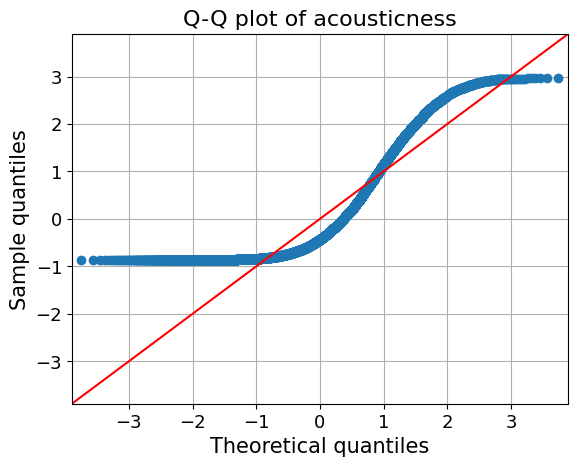

<Figure size 800x500 with 0 Axes>

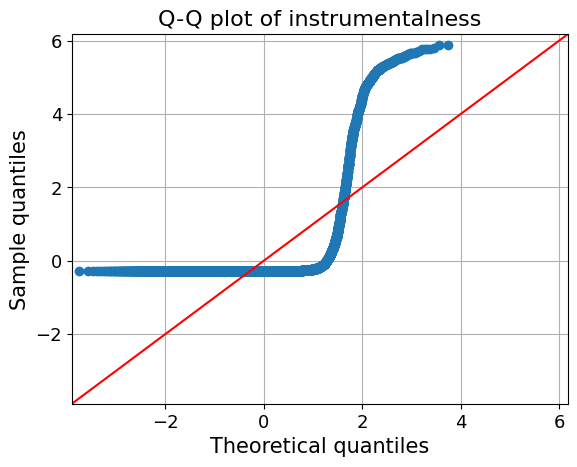

<Figure size 800x500 with 0 Axes>

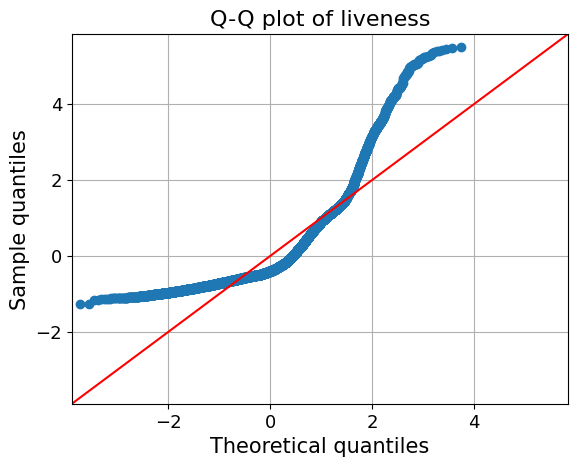

<Figure size 800x500 with 0 Axes>

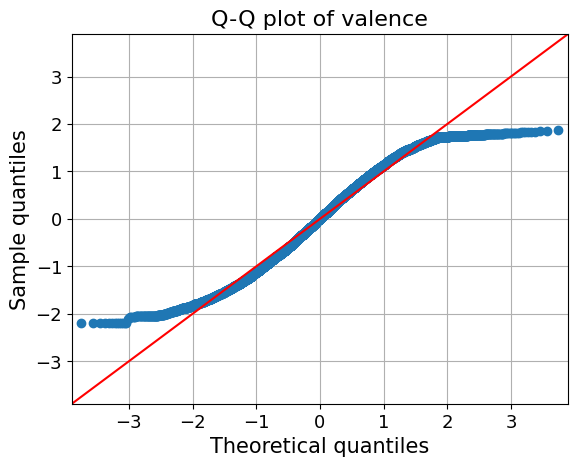

<Figure size 800x500 with 0 Axes>

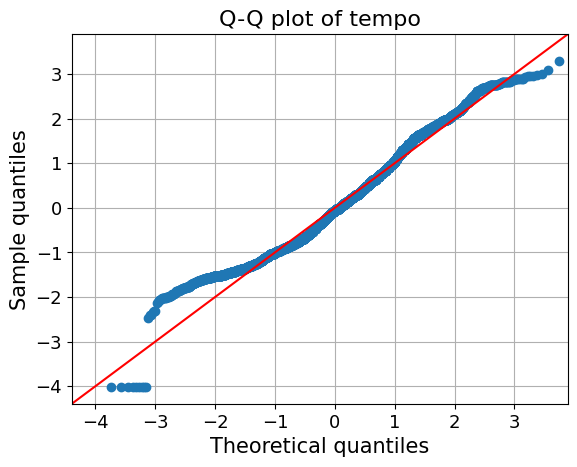

<Figure size 800x500 with 0 Axes>

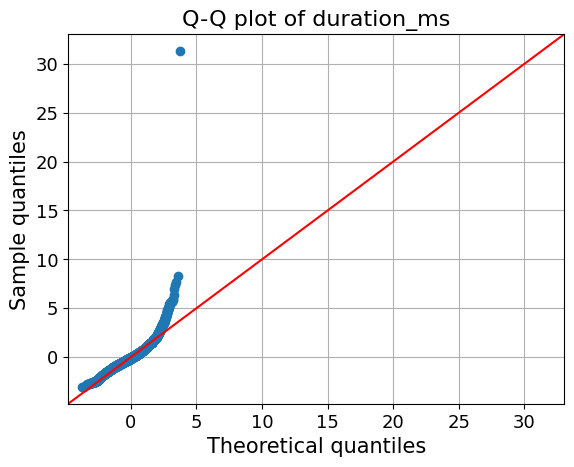

In [8]:
# qq plots for numeric variables to examine their statistical distribution - which ones follow an approximately normal distribution?
from statsmodels.graphics.gofplots import qqplot

data_norm = df[['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

for c in data_norm.columns:
    plt.figure(figsize=(8, 5))
    qqplot(data_norm[c], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

Popularity, danceability, and tempo appear to follow a more normal distribution compared to other variables. We will now explore the individual distribution of each subjective (e.g. acousticness, liveness) and objective (e.g. tempo, duration) musical characteristic of the songs in our dataset:

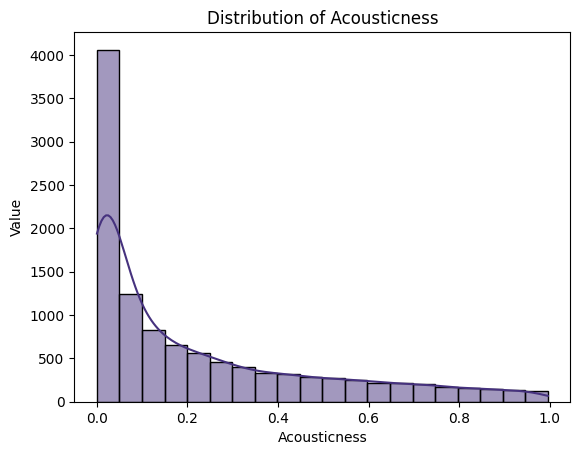

In [9]:
sns.set_palette('viridis')
sns.histplot(df['acousticness'], kde=True, bins=20) 
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Value')
plt.show()

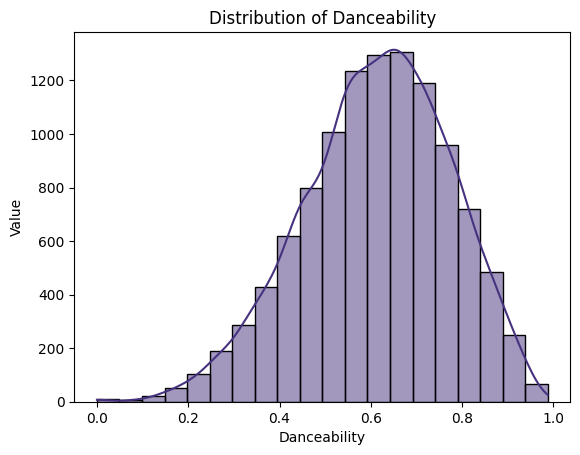

In [10]:
sns.set_palette('viridis')
sns.histplot(df['danceability'], kde=True, bins=20) 
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Value')
plt.show()

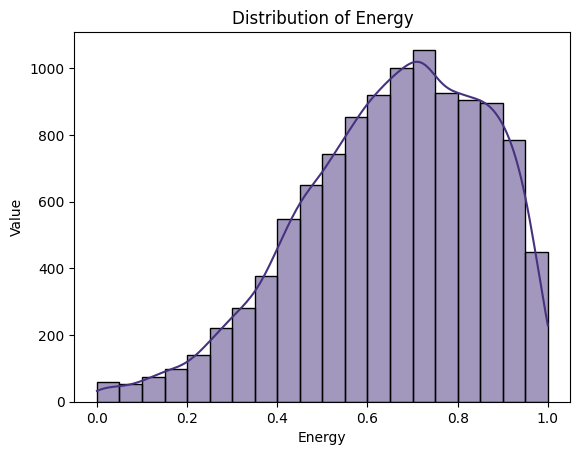

In [11]:
sns.set_palette('viridis')
sns.histplot(df['energy'], kde=True, bins=20) 
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Value')
plt.show()

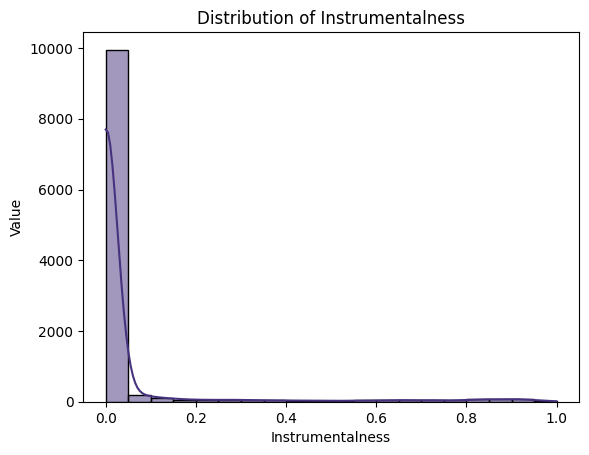

In [12]:
sns.set_palette('viridis')
sns.histplot(df['instrumentalness'], kde=True, bins=20) 
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Value')
plt.show()

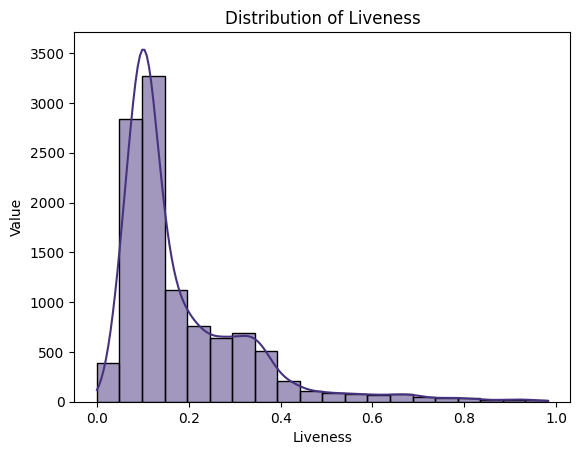

In [13]:
sns.set_palette('viridis')
sns.histplot(df['liveness'], kde=True, bins=20) 
plt.title('Distribution of Liveness')
plt.xlabel('Liveness')
plt.ylabel('Value')
plt.show()

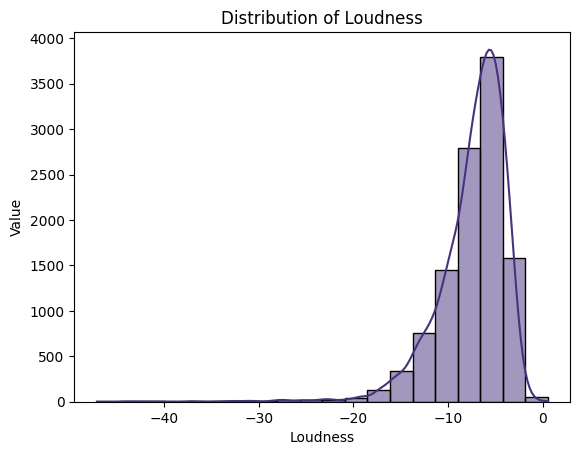

In [14]:
sns.set_palette('viridis')
sns.histplot(df['loudness'], kde=True, bins=20) 
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Value')
plt.show()

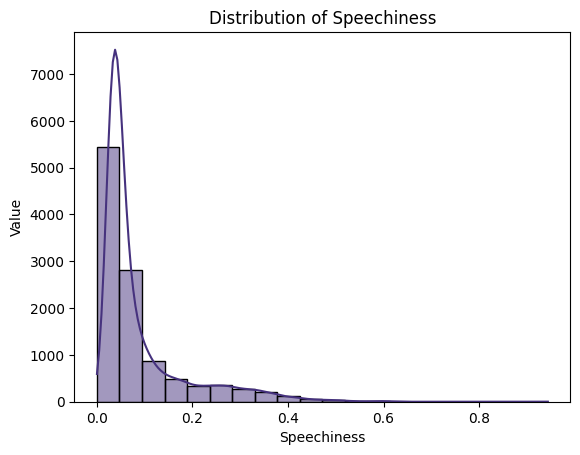

In [15]:
sns.set_palette('viridis')
sns.histplot(df['speechiness'], kde=True, bins=20) 
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Value')
plt.show()

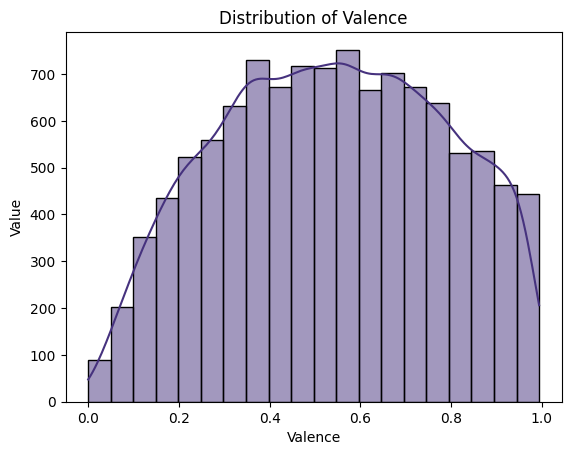

In [16]:
sns.set_palette('viridis')
sns.histplot(df['valence'], kde=True, bins=20) 
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Value')
plt.show()

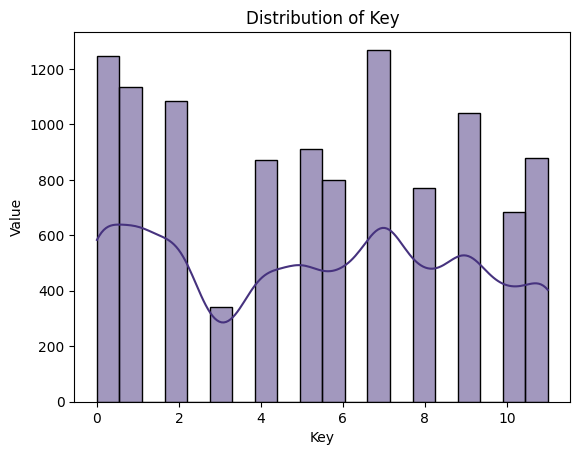

In [17]:
sns.set_palette('viridis')
sns.histplot(df['key'], kde=True, bins=20) 
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.ylabel('Value')
plt.show()

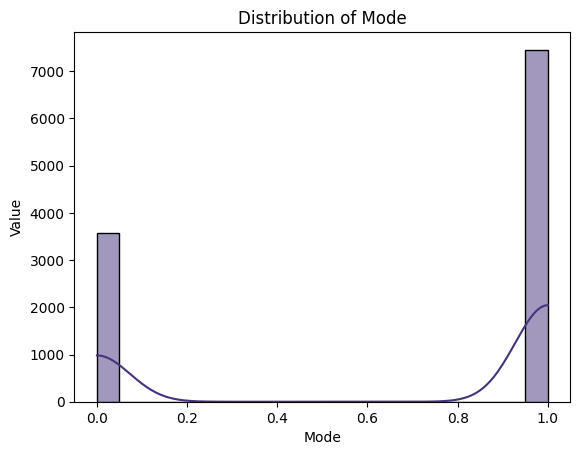

In [18]:
sns.set_palette('viridis')
sns.histplot(df['mode'], kde=True, bins=20) 
plt.title('Distribution of Mode')
plt.xlabel('Mode')
plt.ylabel('Value')
plt.show()

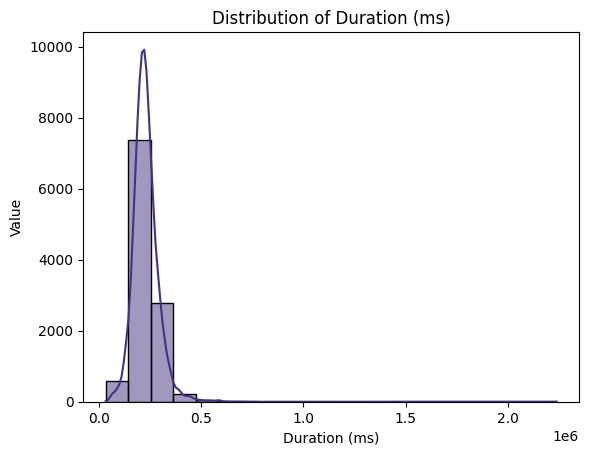

In [19]:
sns.set_palette('viridis')
sns.histplot(df['duration_ms'], kde=True, bins=20) 
plt.title('Distribution of Duration (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Value')
plt.show()

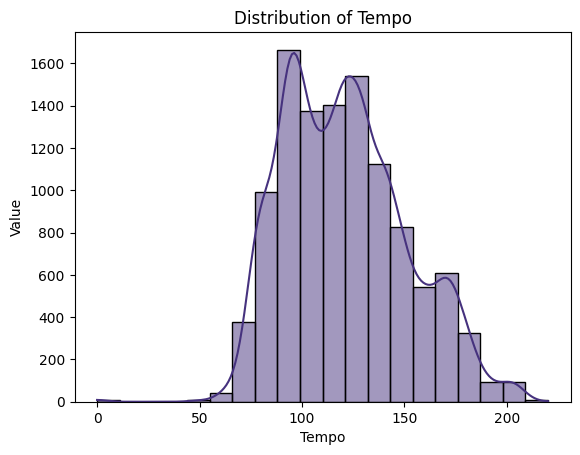

In [20]:
sns.set_palette('viridis')
sns.histplot(df['tempo'], kde=True, bins=20) 
plt.title('Distribution of Tempo')
plt.xlabel('Tempo')
plt.ylabel('Value')
plt.show()

**🔍 Interpretation of Results: **

Danceability: The danceability seems to be slightly left-skewed. A large number of songs have a danceability between 0.6 and 0.65, which falls within the higher range of danceability. 

Energy: The energy of songs appears to be more strongly left-skewed. A large number of songs fall between 0.65 and 0.8. 

Instrumentalness: The distribution of Instrumentalness is extremely right-skewed. Most songs fall between 0.0 and 0.1. 

Liveness: This feature is heavily right-skewed. Most songs have a low liveness, between 0.1 and 0.15. 

Loudness: The distribution of Loudness appears to be left-skewed. Most songs fall baetween -10 and -5. 

Speechiness: This feature appears to be very right-skewed. Most songs fall between 0.1 and 0.15. Valence: This feature is somewhat normally distributed. 

Key: This feature is somewhat uniformly distributed, but in general, there does not seem to be any relationship. 

Mode: There does not appear to be any relationship. 

Duration: This feature appears to be right-skewed, with most songs around 0.25. 

Tempo: This feature appears slightly bimodal, with a dip at around 110.

### Bivariate Analysis

We will now analyze the distribution of musical characteristics for songs released in different years.

##### Acousticness

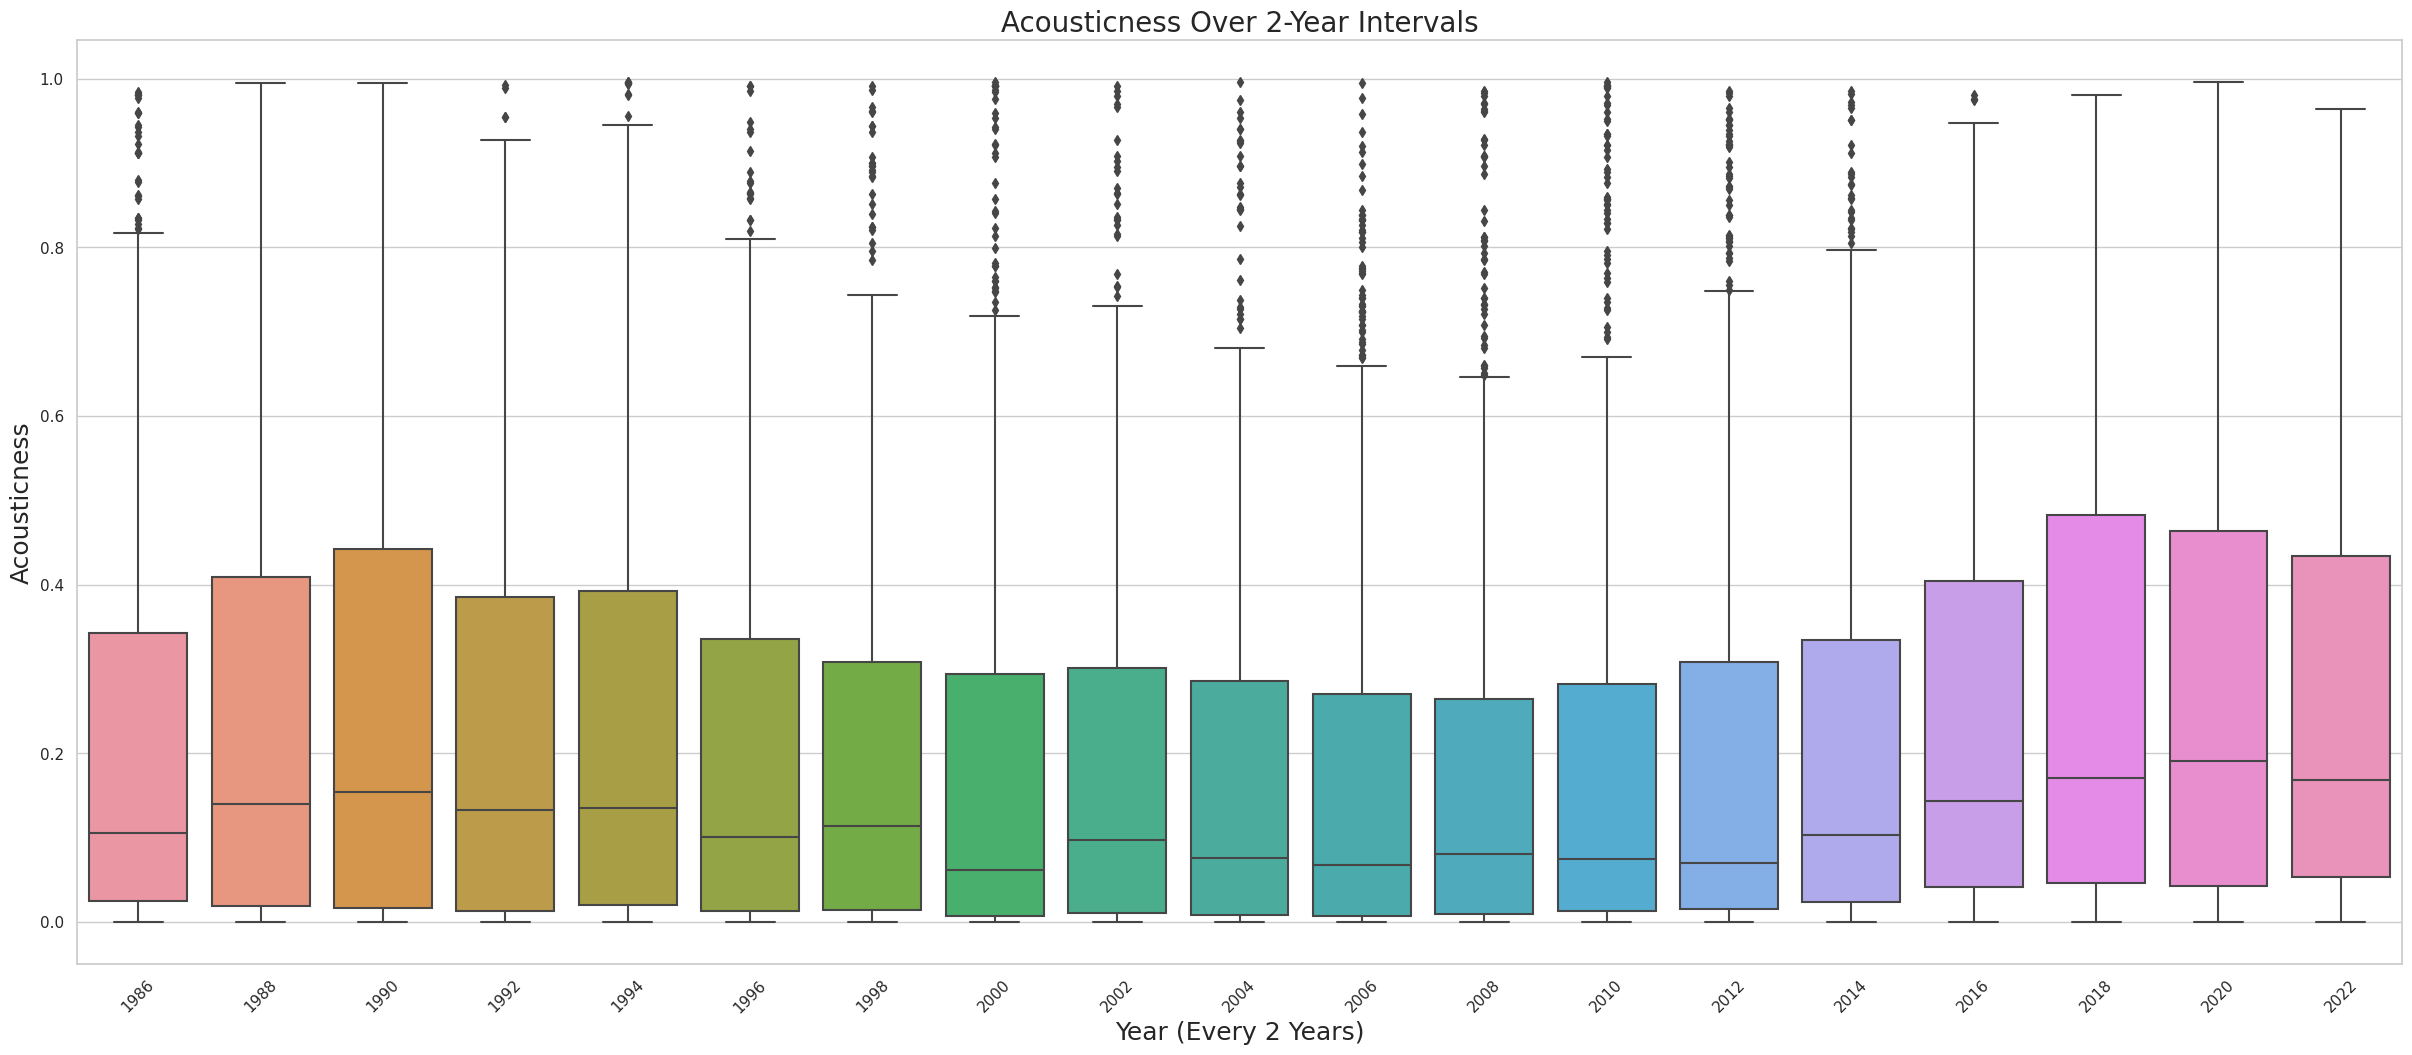

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="acousticness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Acousticness", size=18)
plt.title('Acousticness Over 2-Year Intervals', size=20)
plt.show()

While the median value of acousticness has not fluctuated too much over the years, it can be observed that the range of acousticness values saw a decline in the early 2000s, then widened again in the 2010s. 

##### Danceability

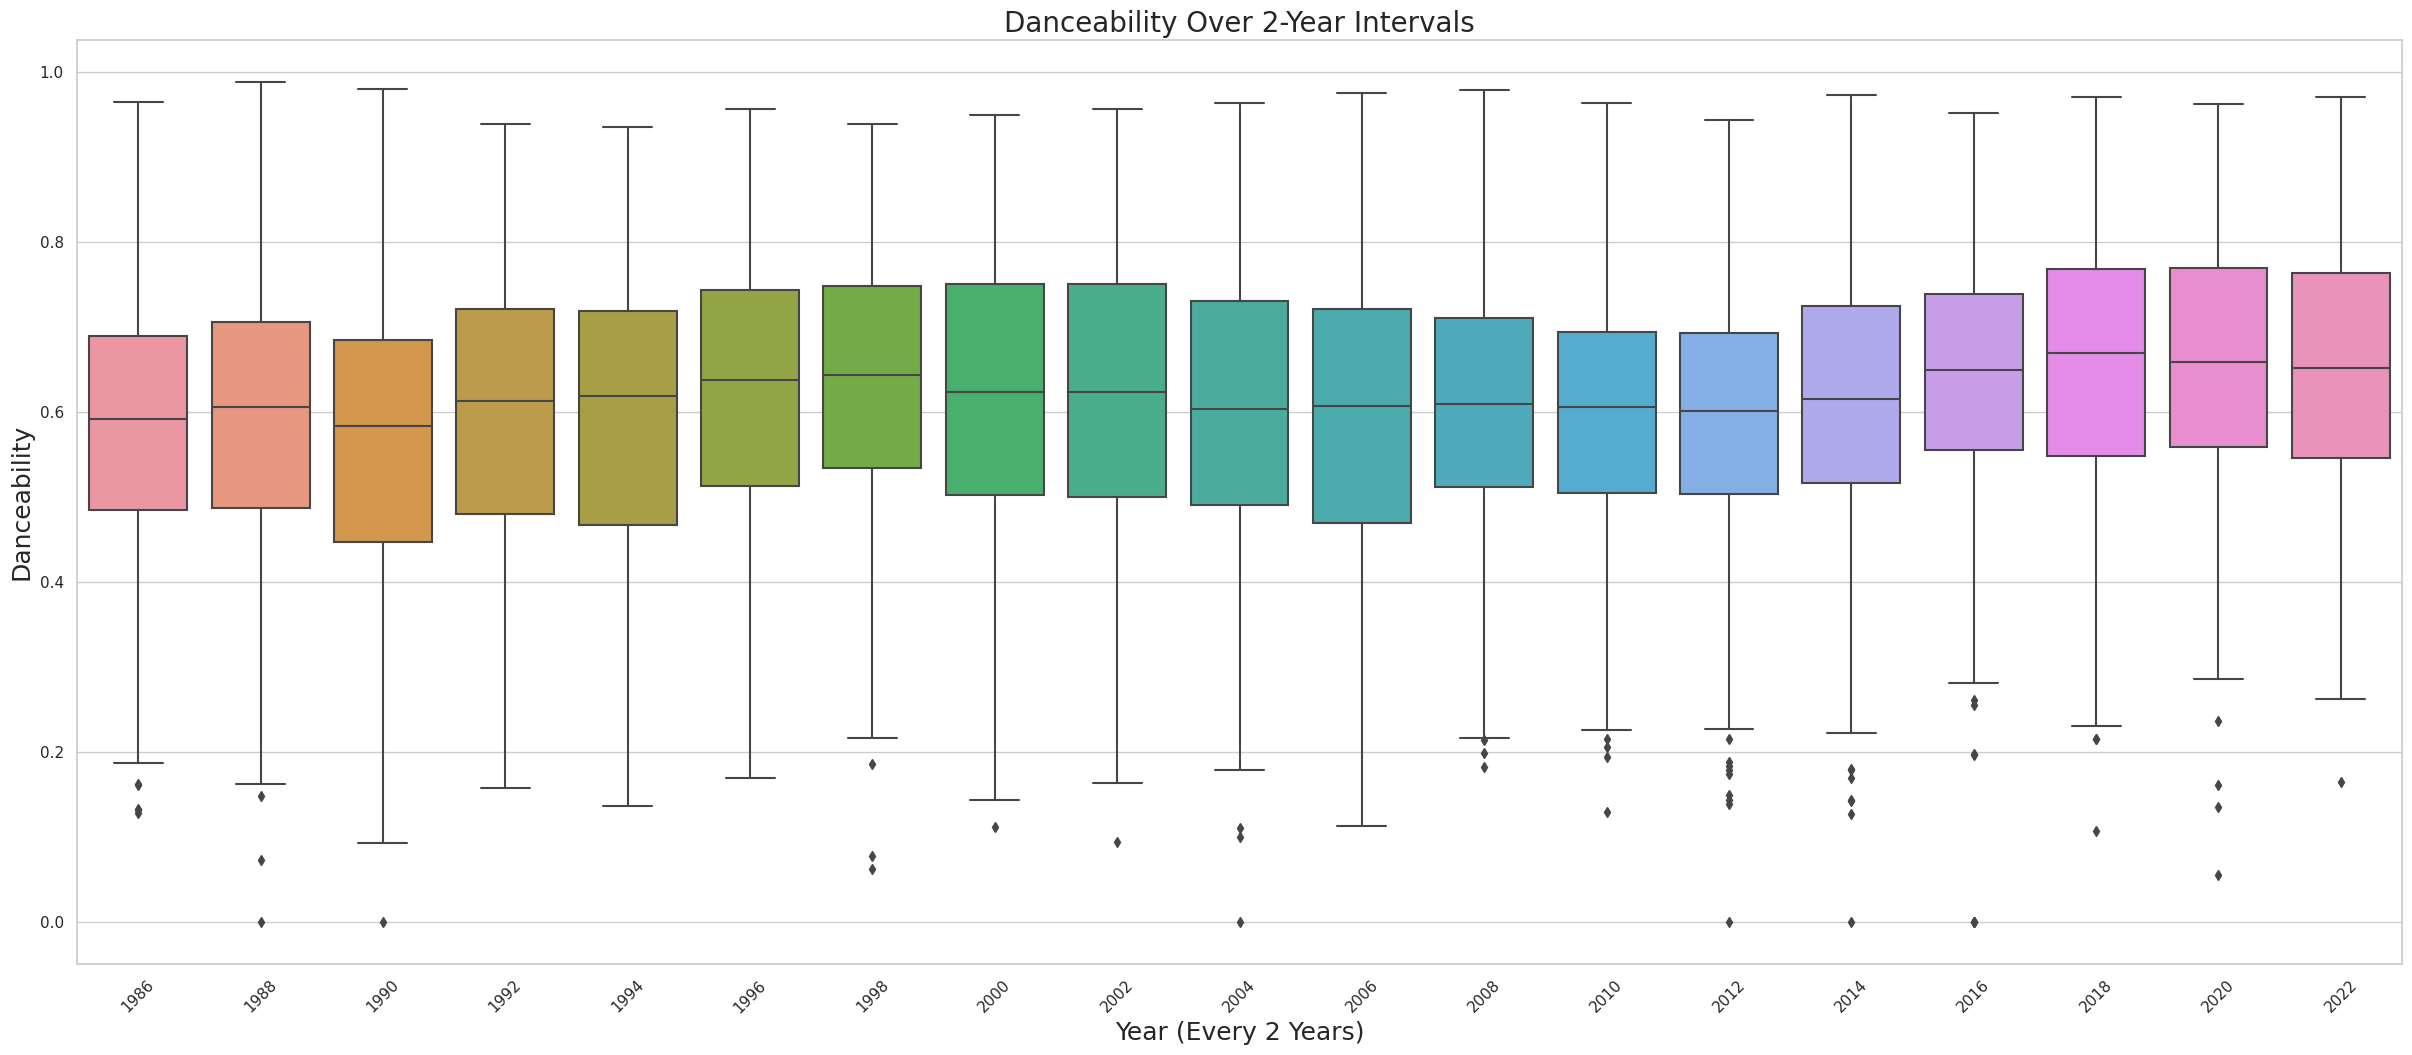

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="danceability", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Danceability", size=18)
plt.title('Danceability Over 2-Year Intervals', size=20)
plt.show()

Danceability has remained relatively stable.

##### Energy

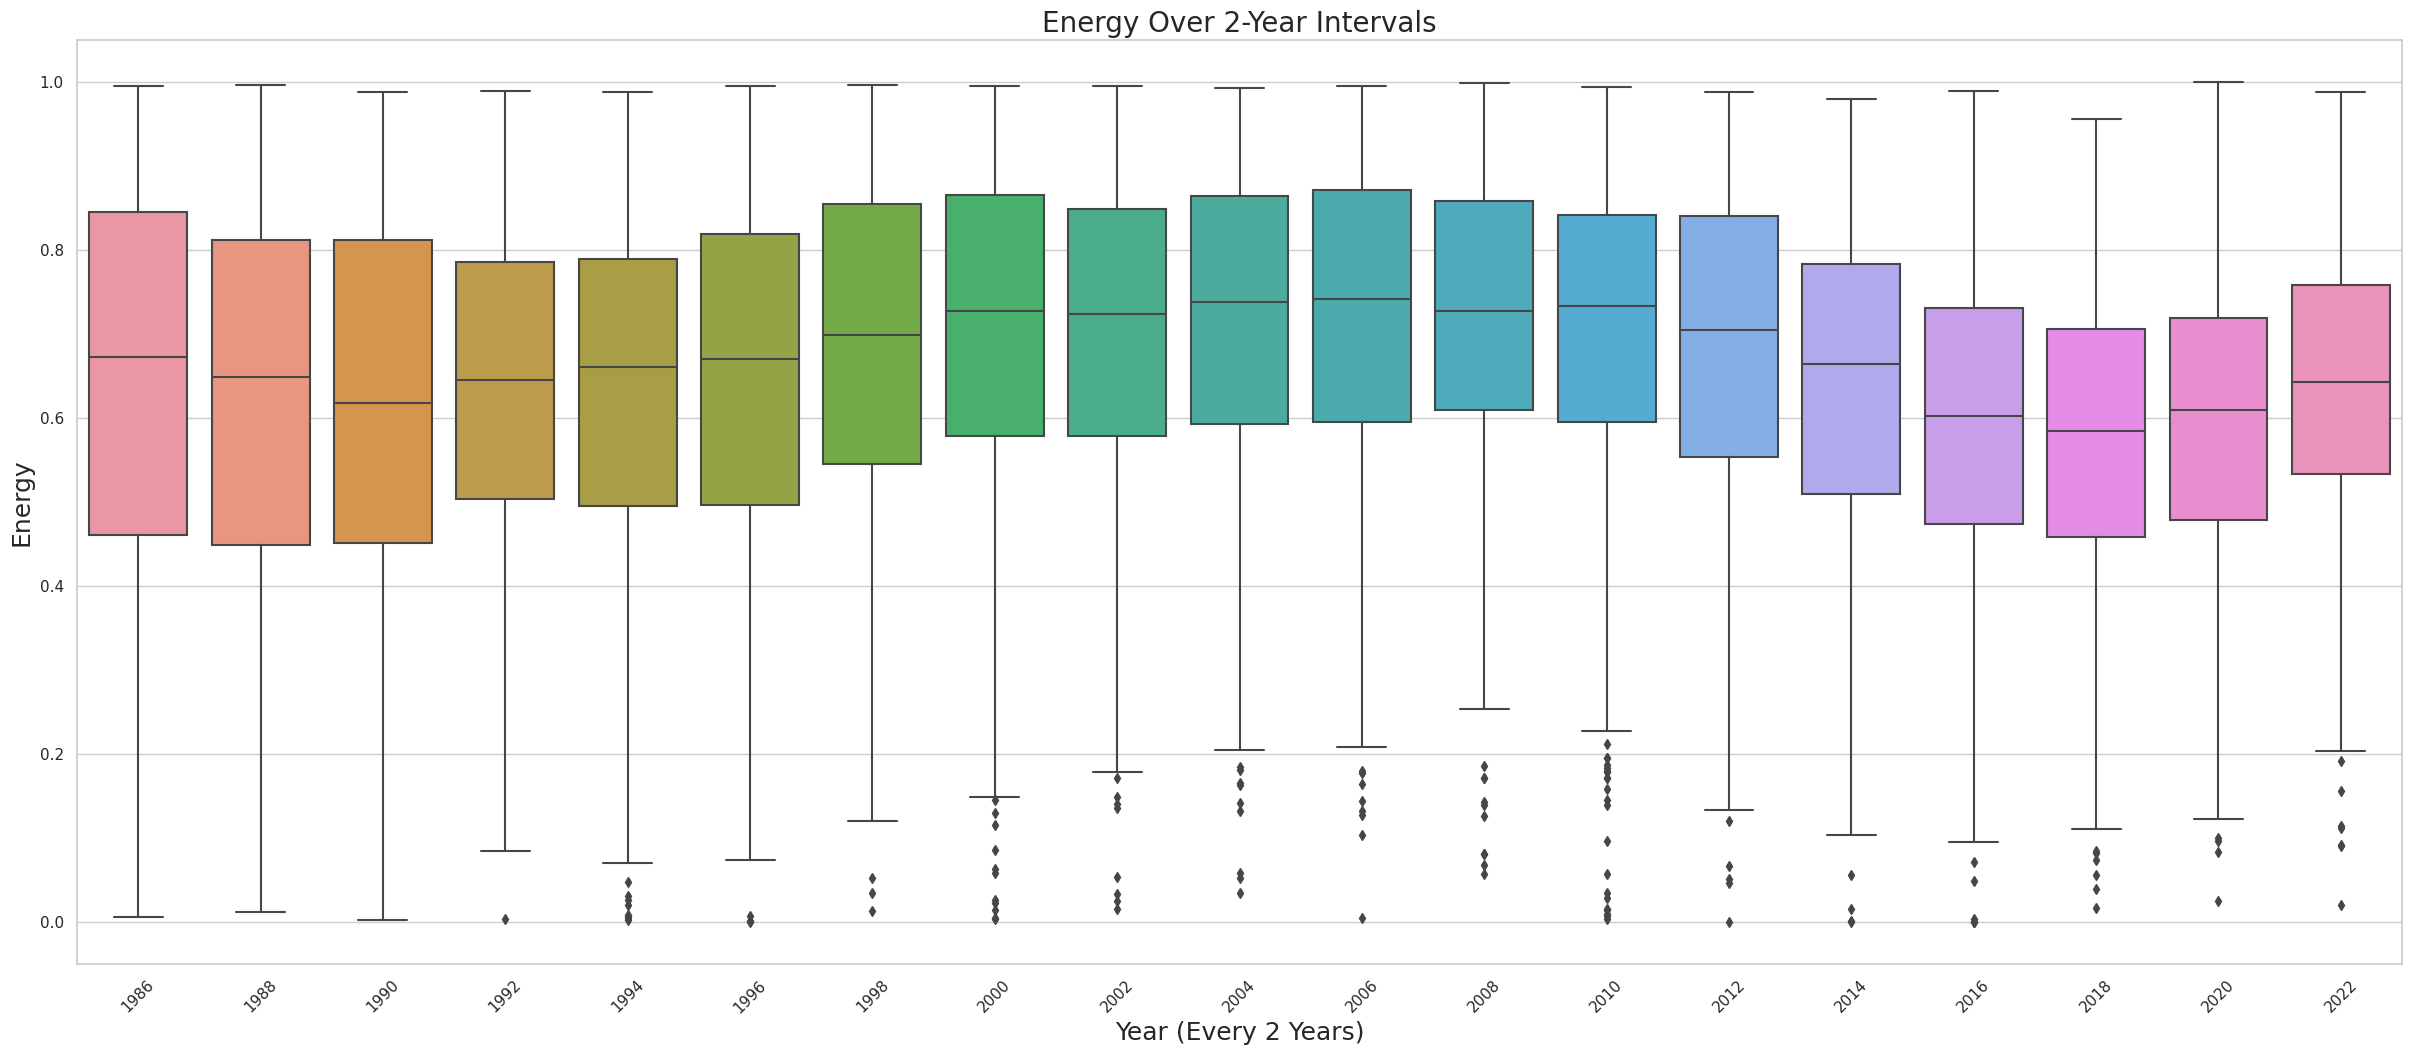

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="energy", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Energy", size=18)
plt.title('Energy Over 2-Year Intervals', size=20)
plt.show()

Energy seems to have seen a decline in the early 2010s, but it has been steadily rising over the past 4 years. This may signify a turnaround towards more energetic songs in the future.

##### Instrumentalness

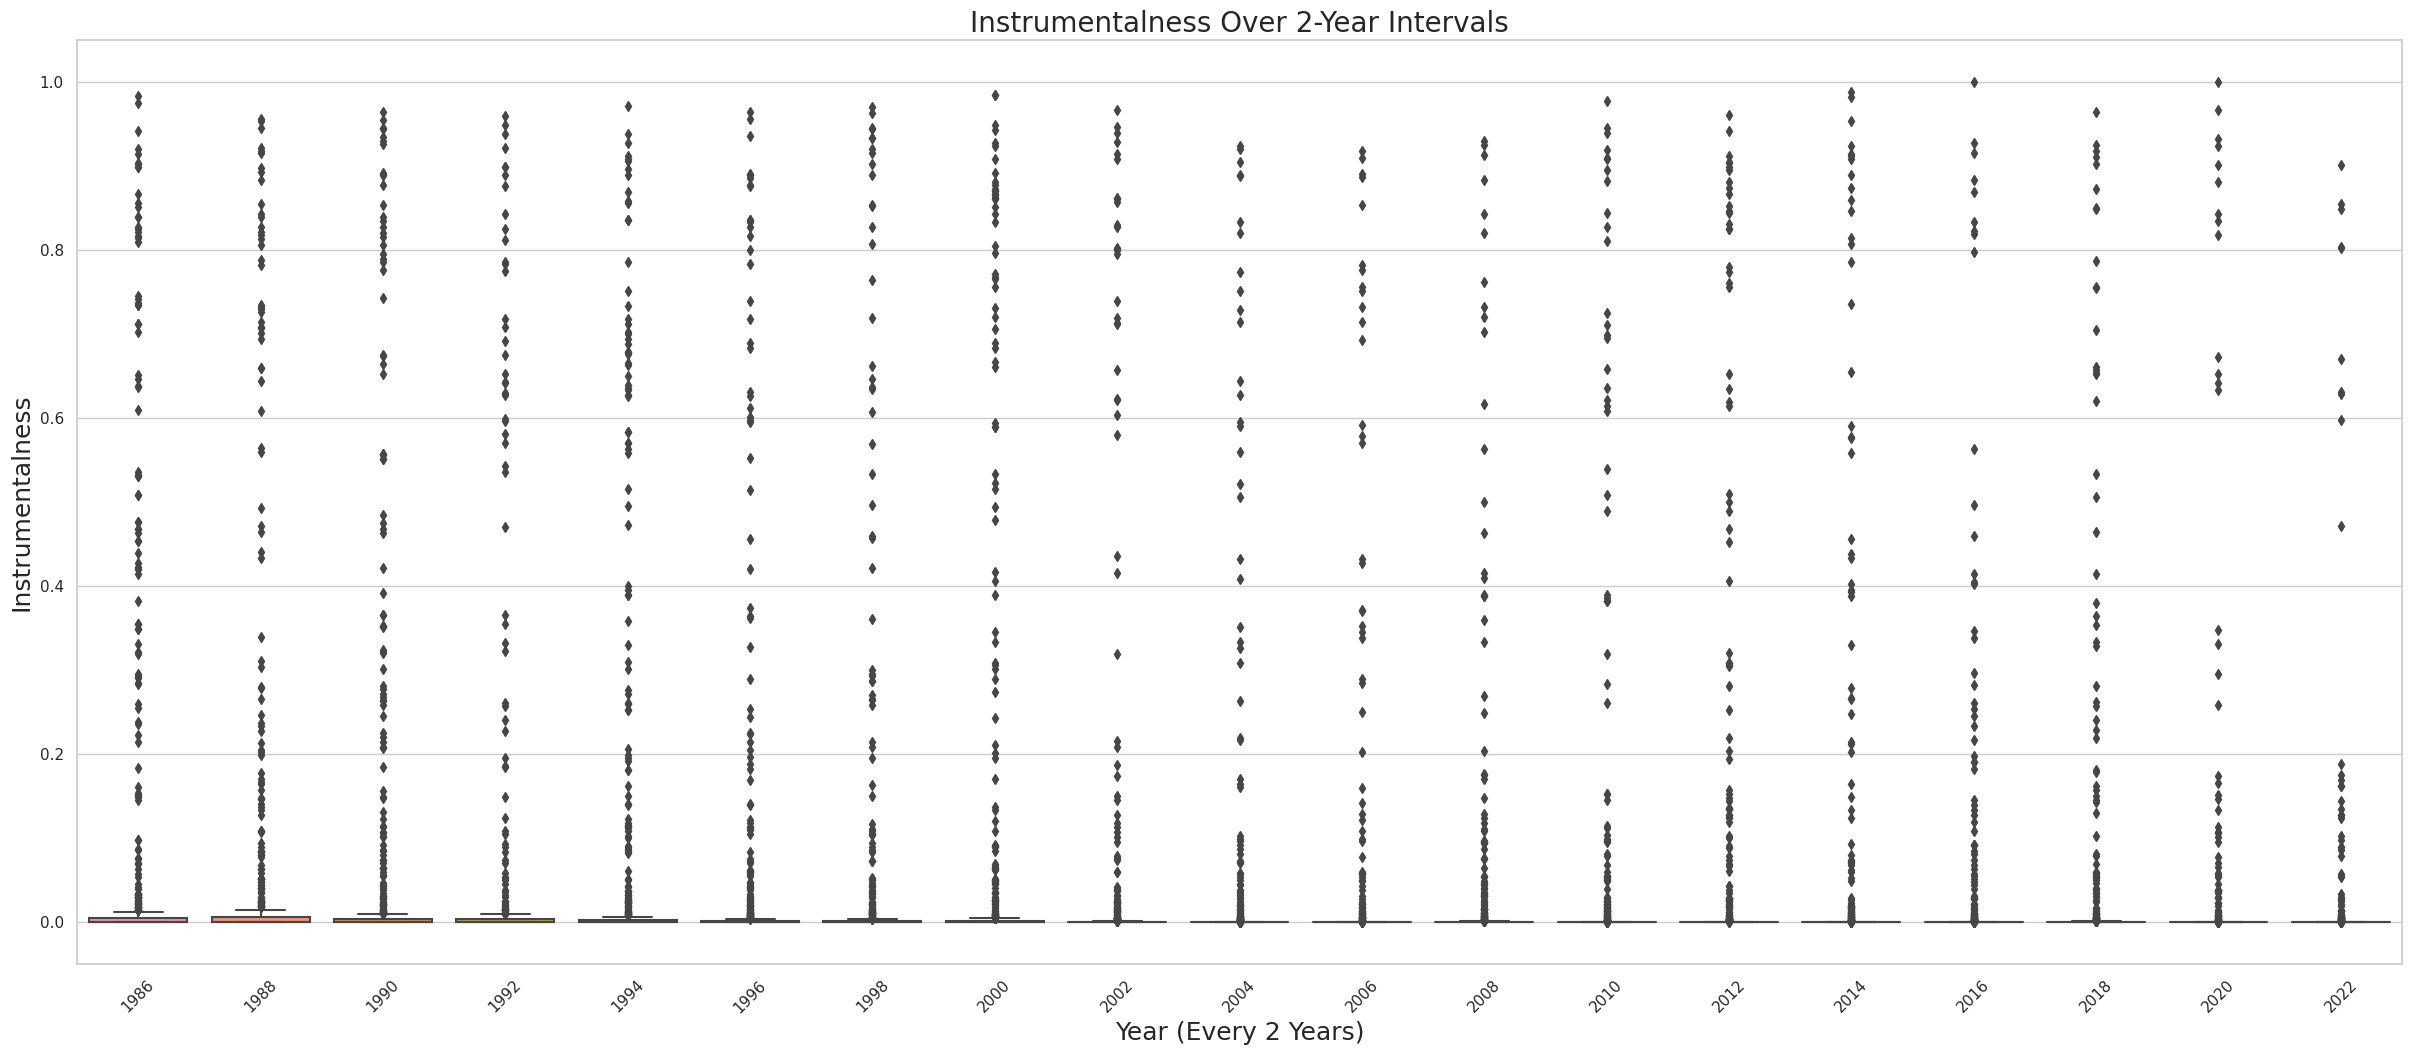

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="instrumentalness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Instrumentalness", size=18)
plt.title('Instrumentalness Over 2-Year Intervals', size=20)
plt.show()

We recall that for instrumentalness, the closer a song's value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. 

In all years, there is a higher concentration of vocal songs than instrumental songs. However, the clusters of points representing instrumental tracks have become less and less "thick" over time, especially starting from 2004. We can infer that released songs are becoming more frequently non-instrumental.

##### Liveness

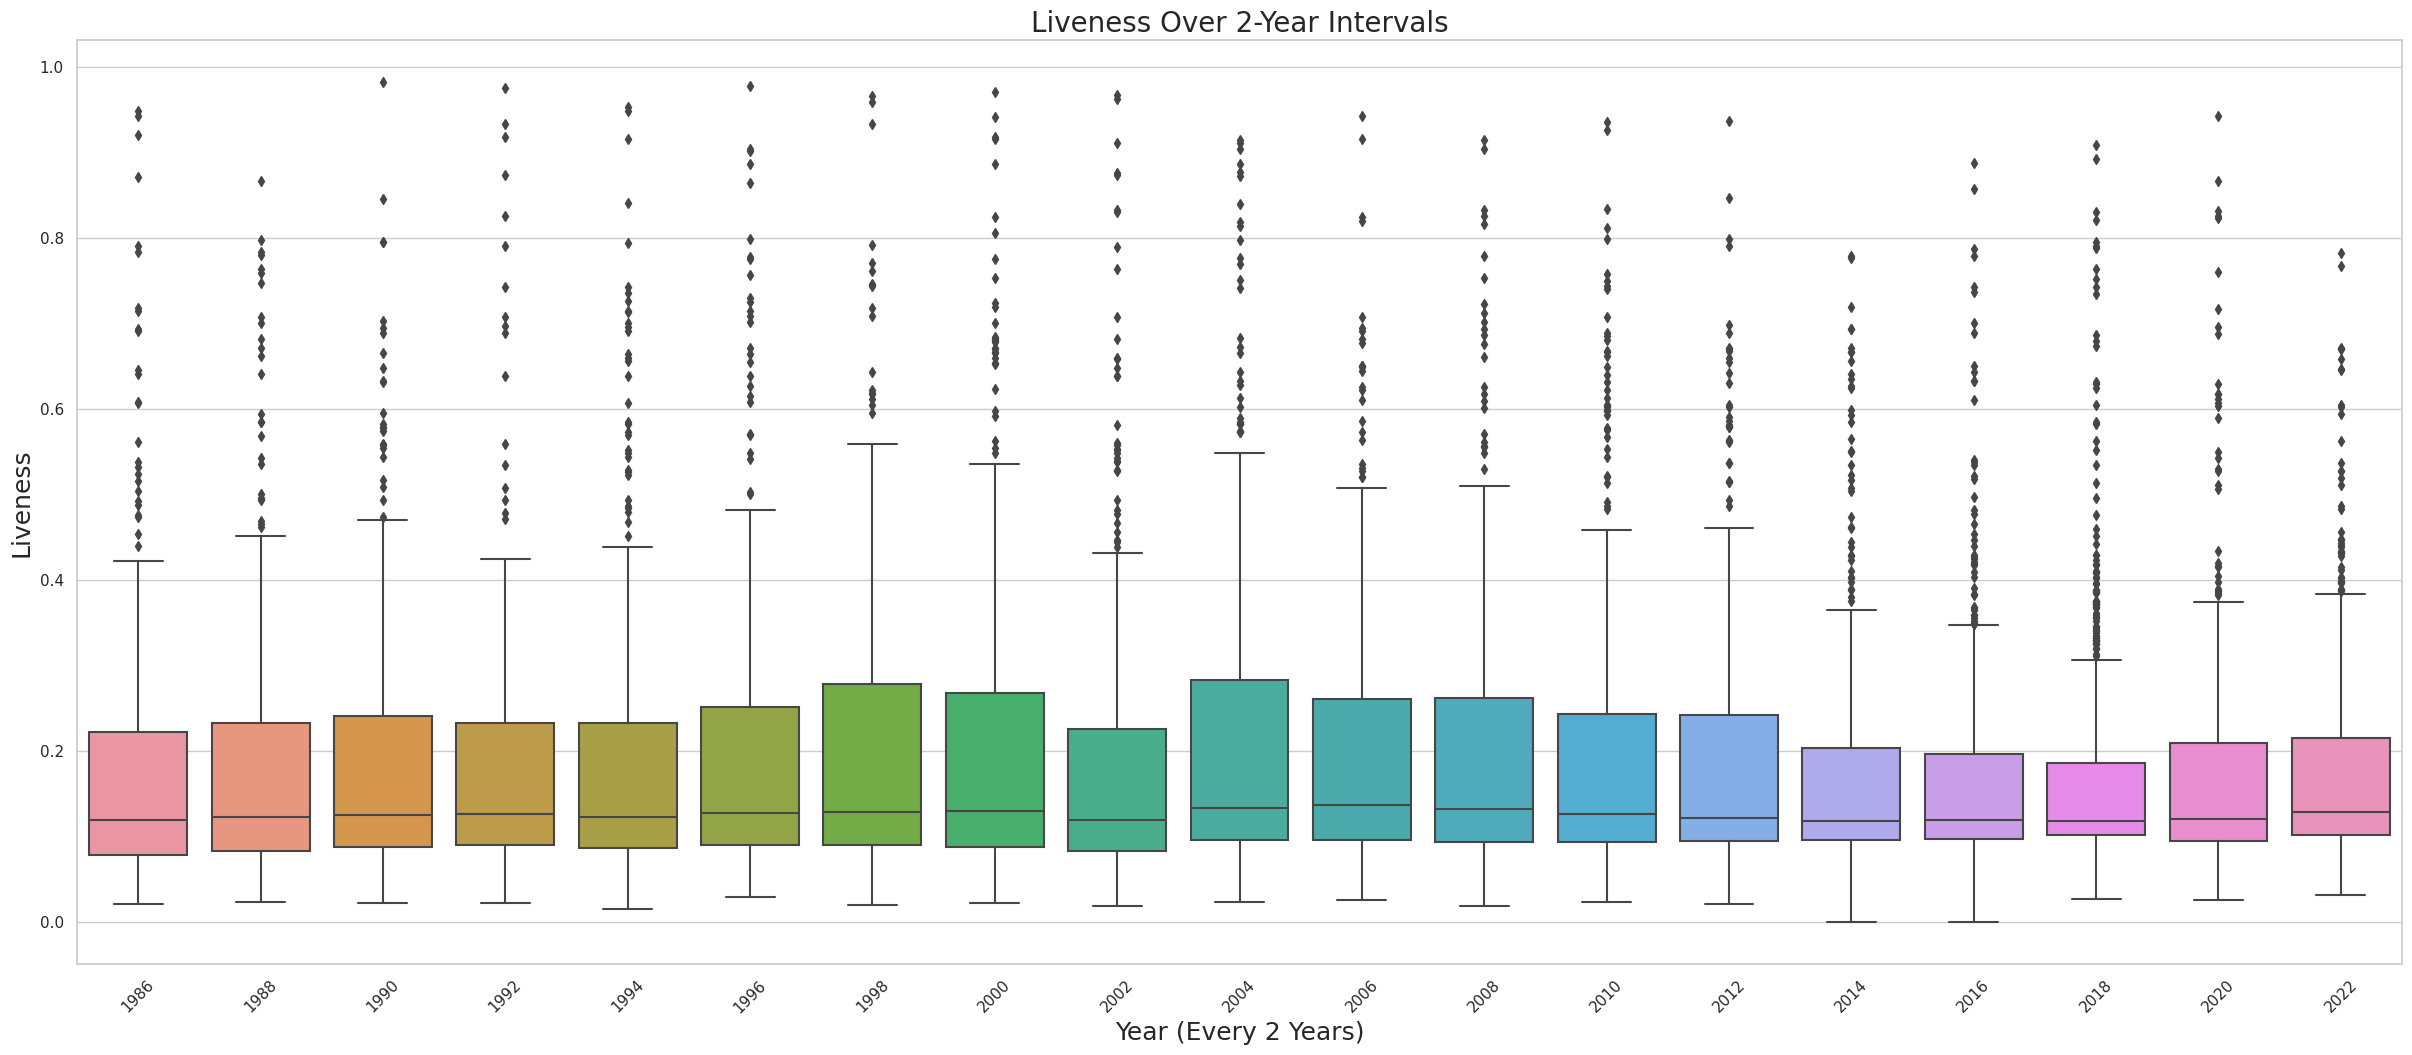

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="liveness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Liveness", size=18)
plt.title('Liveness Over 2-Year Intervals', size=20)
plt.show()

While the median values of liveness have remained relatively stable, there is a noticeably higher concentration of songs with significantly high levels of liveness beginning in 2014. This is hardly surprising, as the measure of liveness is implicitly linked to concerts and musical events, as well as how they are being recorded. More "live" tracks or concert tracks are being featured on streaming platforms like Spotify for fans to be able to listen to songs as if they were being performed at a concert. 

##### Loudness

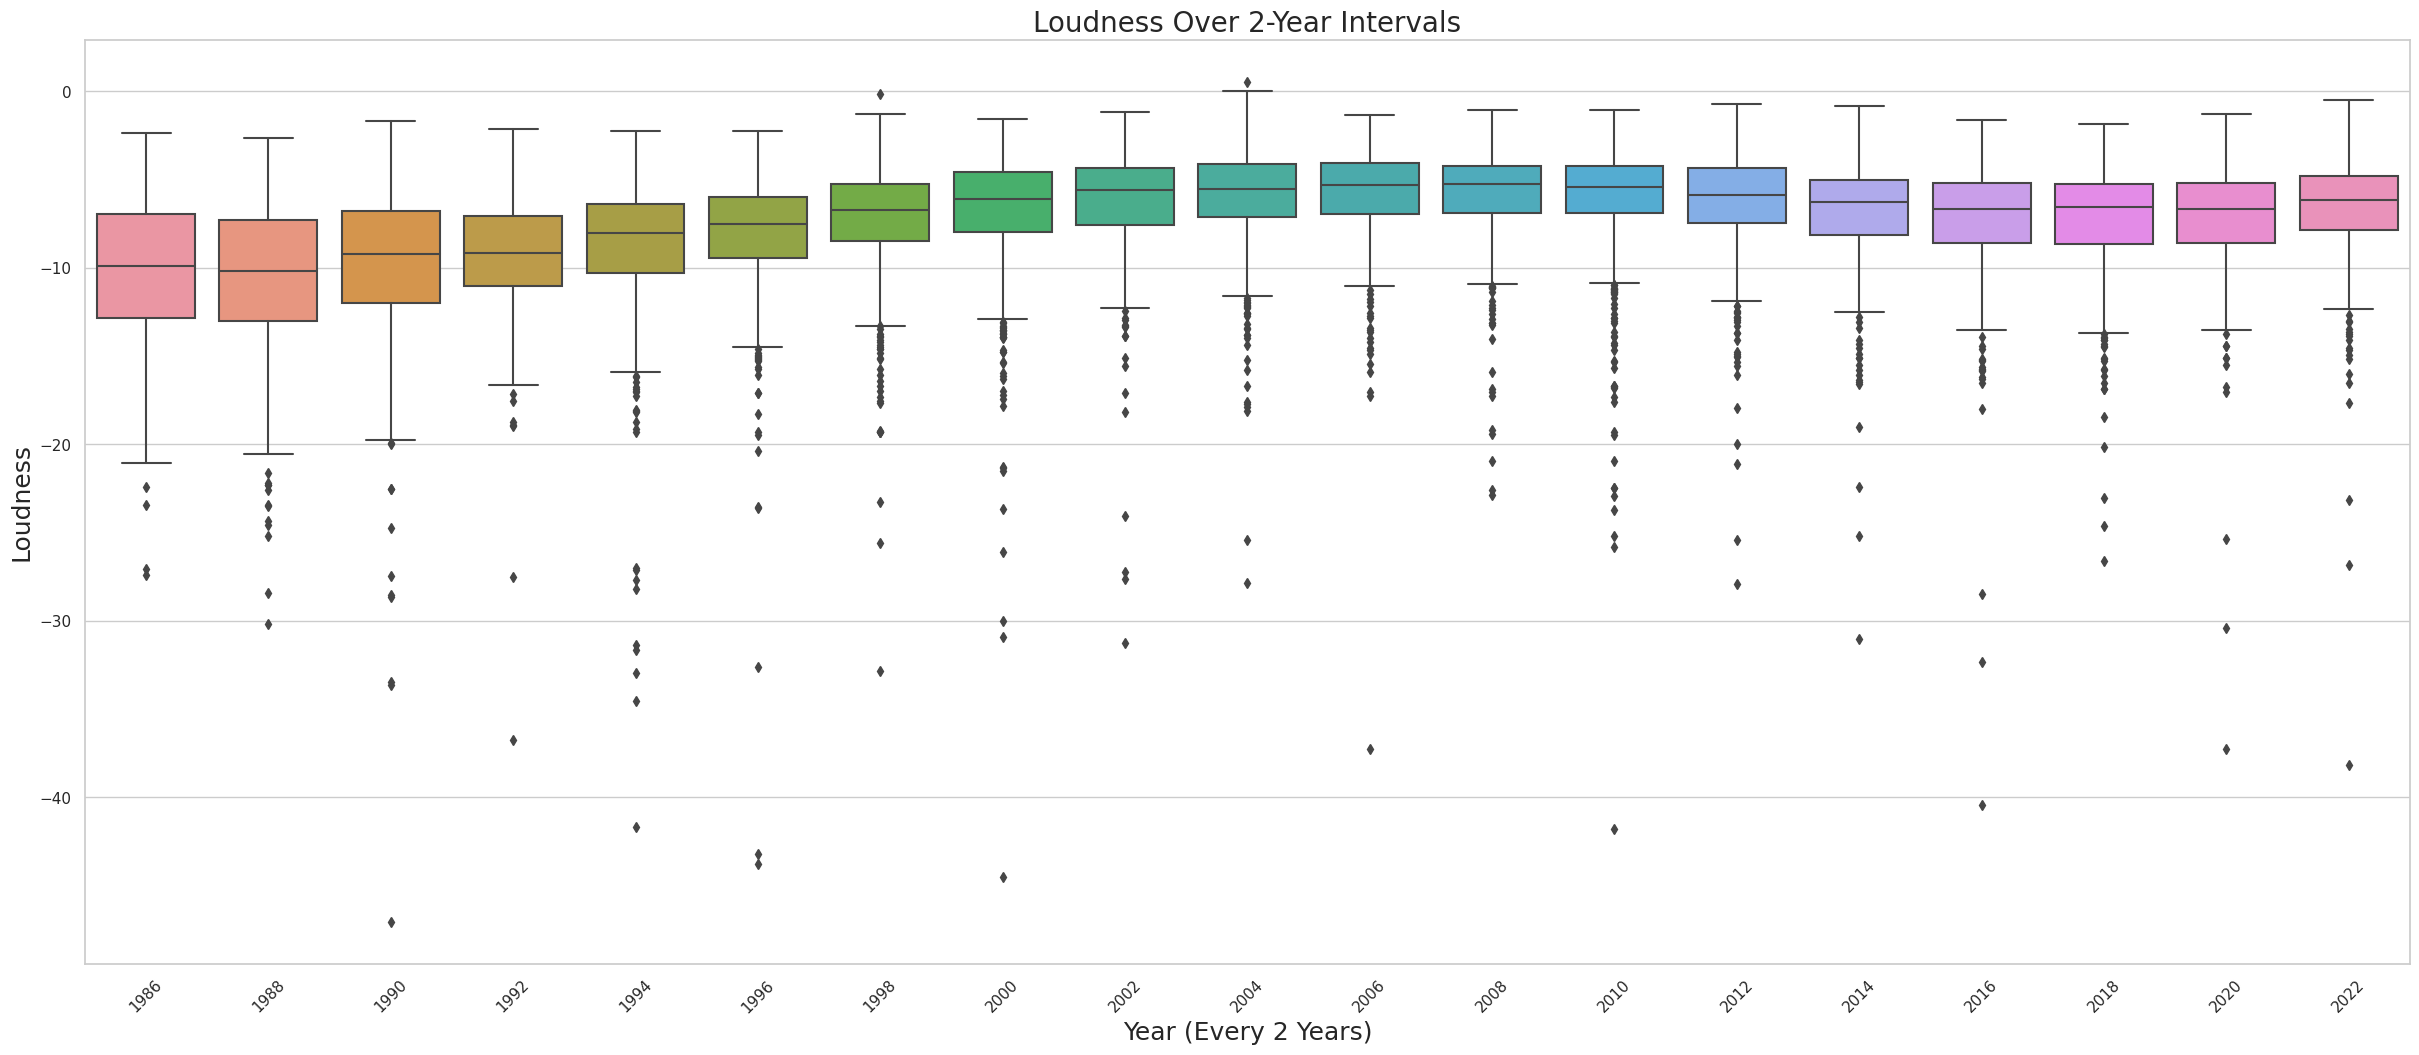

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="loudness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Loudness", size=18)
plt.title('Loudness Over 2-Year Intervals', size=20)
plt.show()

We observe a steady increase in loudness from 1986 to 2006, then a stabilization from then on afterwards.

##### Speechiness

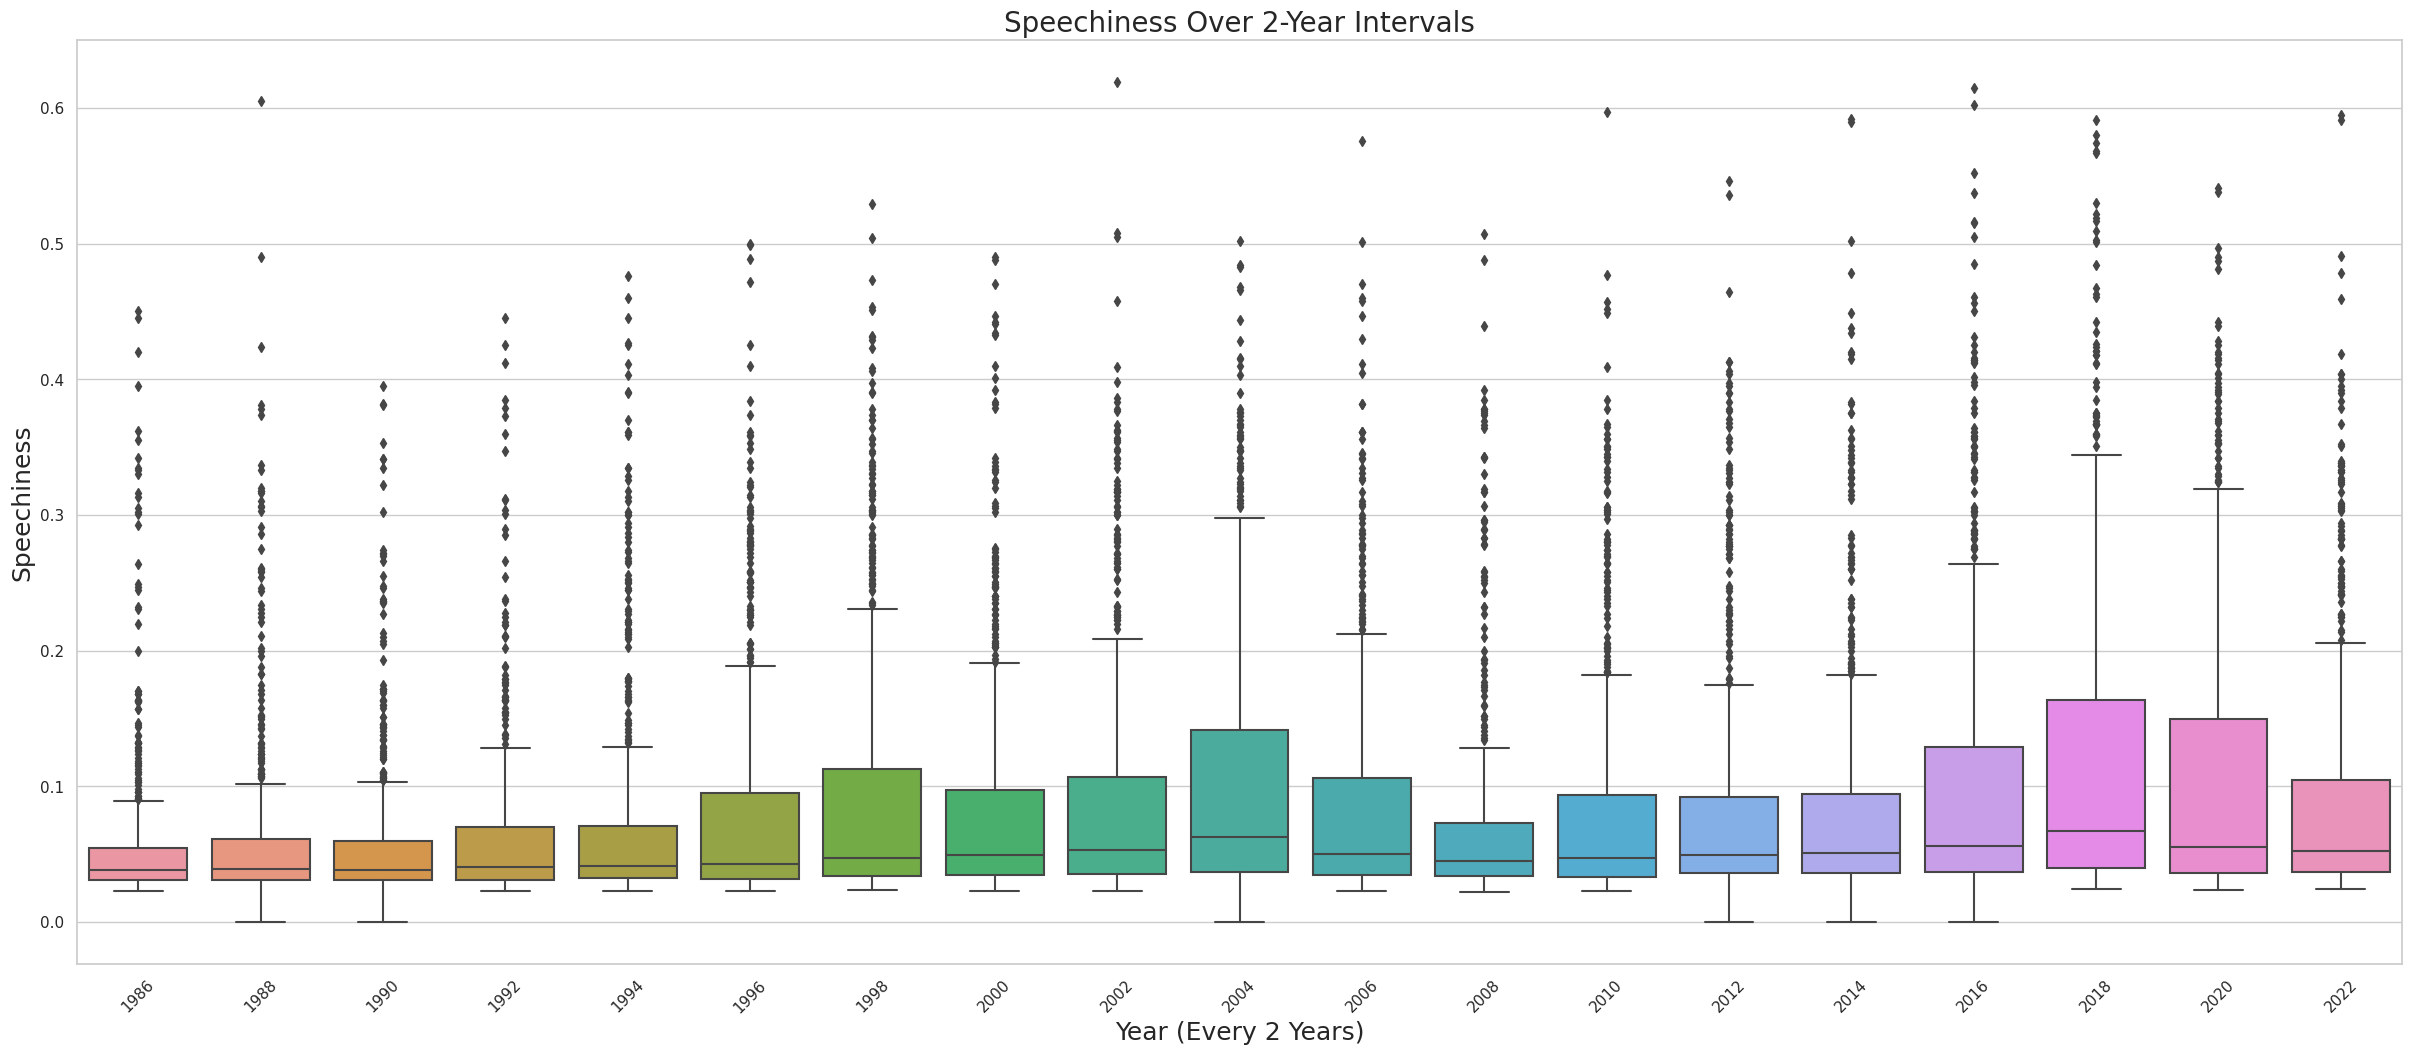

In [27]:
df2 = df[df.speechiness < 0.66]

sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df2['year'] // 2 * 2, y="speechiness", data=df2)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Speechiness", size=18)
plt.title('Speechiness Over 2-Year Intervals', size=20)
plt.show()

Speechiness has remained relatively stable over time.

##### Valence

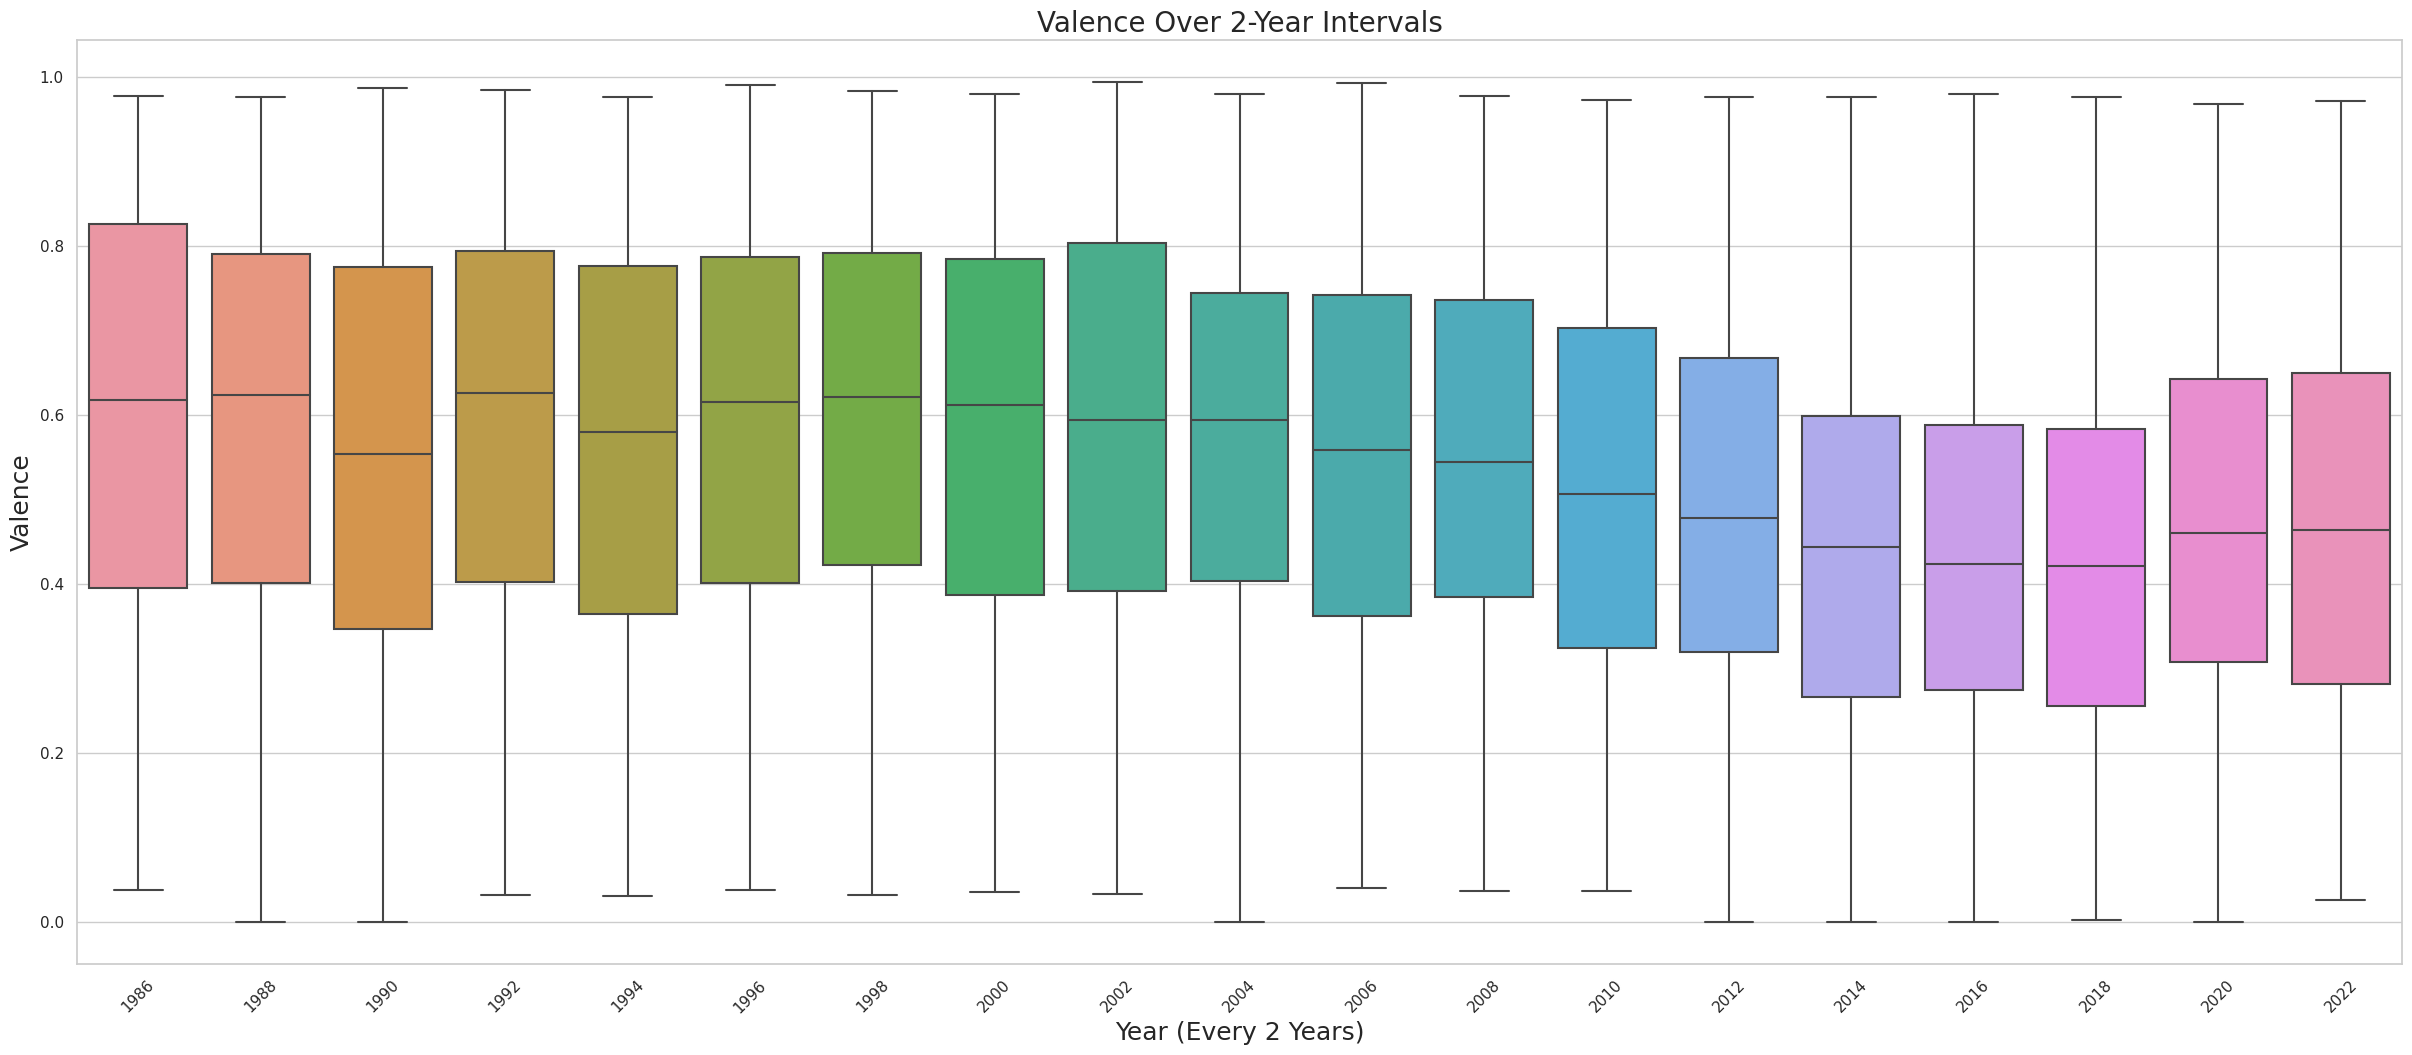

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="valence", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Valence", size=18)
plt.title('Valence Over 2-Year Intervals', size=20)
plt.show()

There seems to have been a declining trend in valence up until 2018, but the past four years may signify a turnaround.

##### Key

As key is a categorical feature, we will use a violin plot to visualize its distribution over the years:

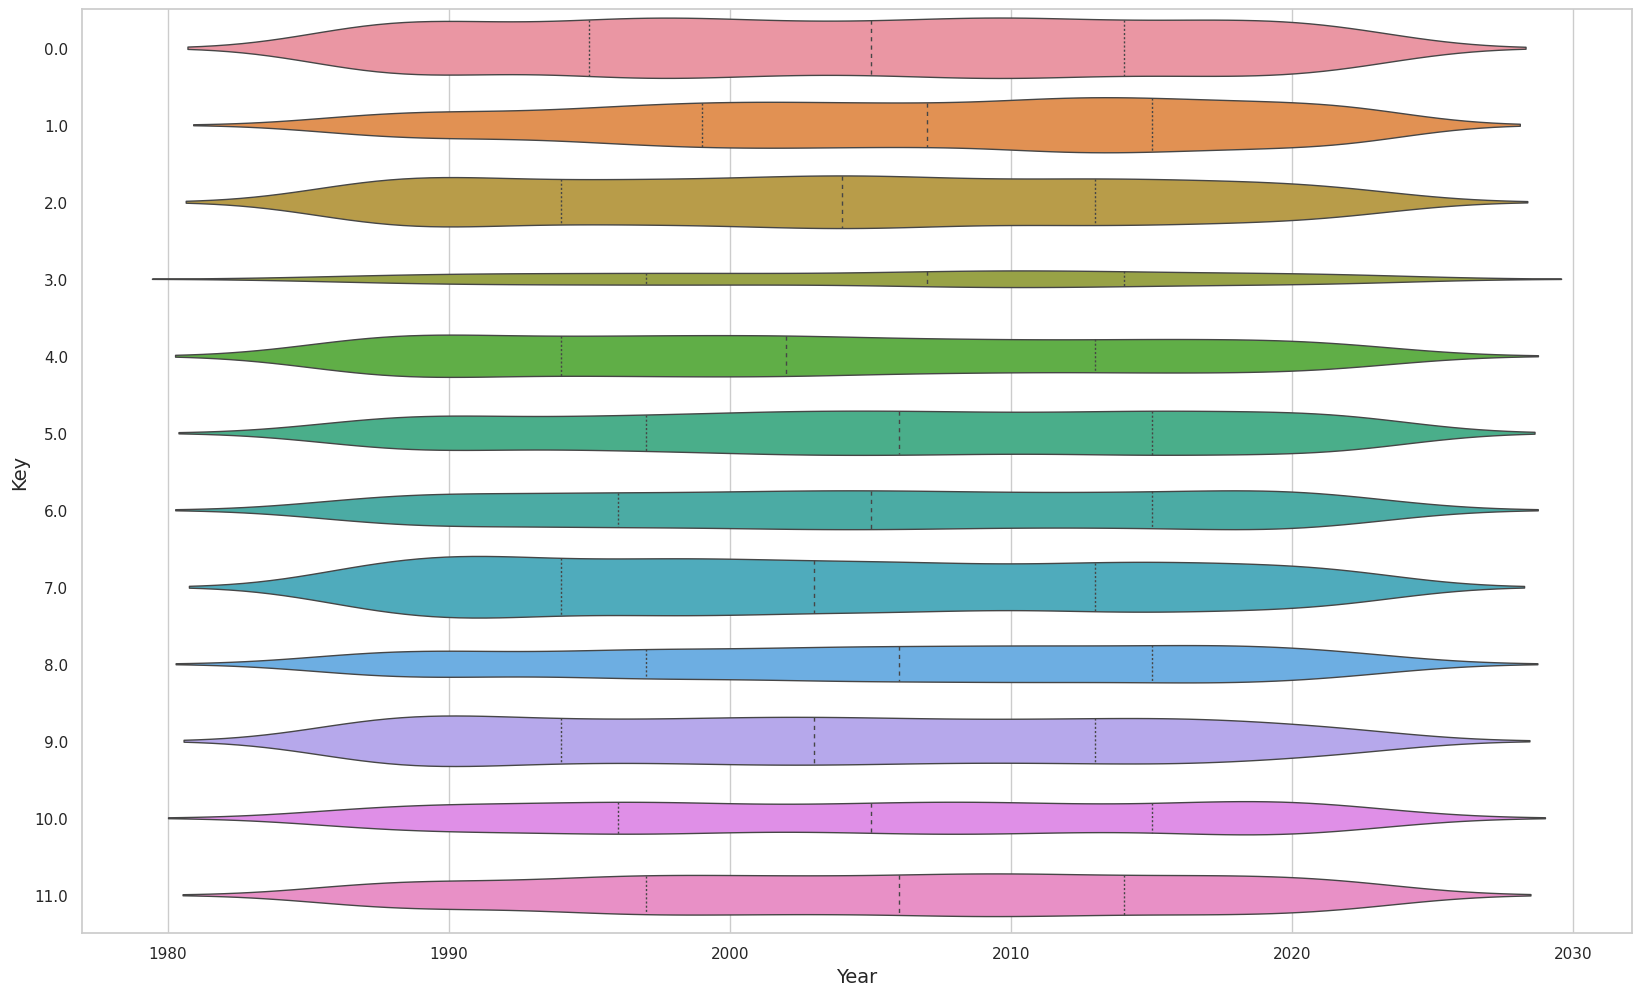

In [29]:
df['key'] = df['key'].astype('category')

# Set the style of the visualization
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Create a violin plot using Seaborn
sns.violinplot(data=df, x="year", y="key",
               split=True, inner="quart", linewidth=1, orient="h", scale='count')

# Set labels and title
plt.xlabel("Year", size=14)
plt.ylabel("Key", size=14)

# Show the plot
plt.show()

We set the parameter of the plot so that the width of each violin visualizes the overall count of each key. C and G (0 and 7) are, unsurprisingly, the most prevalent keys among our songs over the years. From a musical perspective, I can infer that C major and G major are commonly used in songs and compositions. I would also label these keys as the most pleasant, upbeat, and modern. 

Additionally, we discern an alternating pattern within the violin plot, where every other violin has a larger width than the ones in between. These are the keys which start on a note with no sharps or flats--on piano, the white keys. This is interesting to think about from a musical composition perspective. It is possible that these keys are easier to transcribe, write for, or are anticipated to be more widely accepted by listeners.

We can get the most used key for every year using a lambda function:

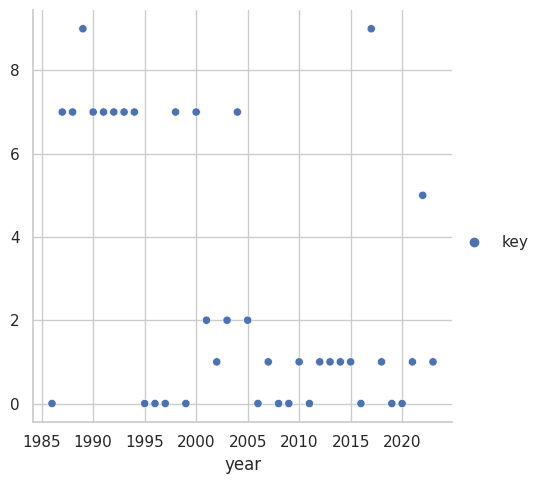

In [30]:
yrly_key_mode = df.groupby('year').apply(lambda x: x['key'].value_counts().idxmax()).to_frame(name="key")
# yrly_key_mode.rename(columns={"0": "key"}, inplace=True)
sns.relplot(data=yrly_key_mode);

Again, it can observed that C (0) and G(7) are the most used keys. 

##### Mode

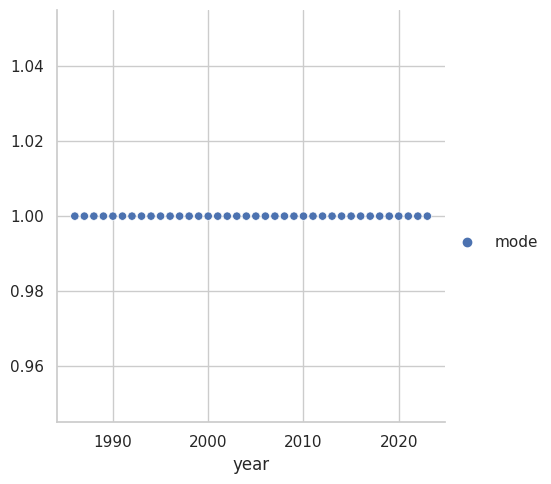

In [31]:
yrly_modality_mode = df.groupby('year').apply(lambda x: x['mode'].value_counts().idxmax()).to_frame(name='mode')
sns.relplot(data=yrly_modality_mode);

The most used mode for every year is major (1). Again, unsurprising--minor keys can be spooky, off-putting, and edgy. This would not be a good pick for most popular songs.

##### Duration

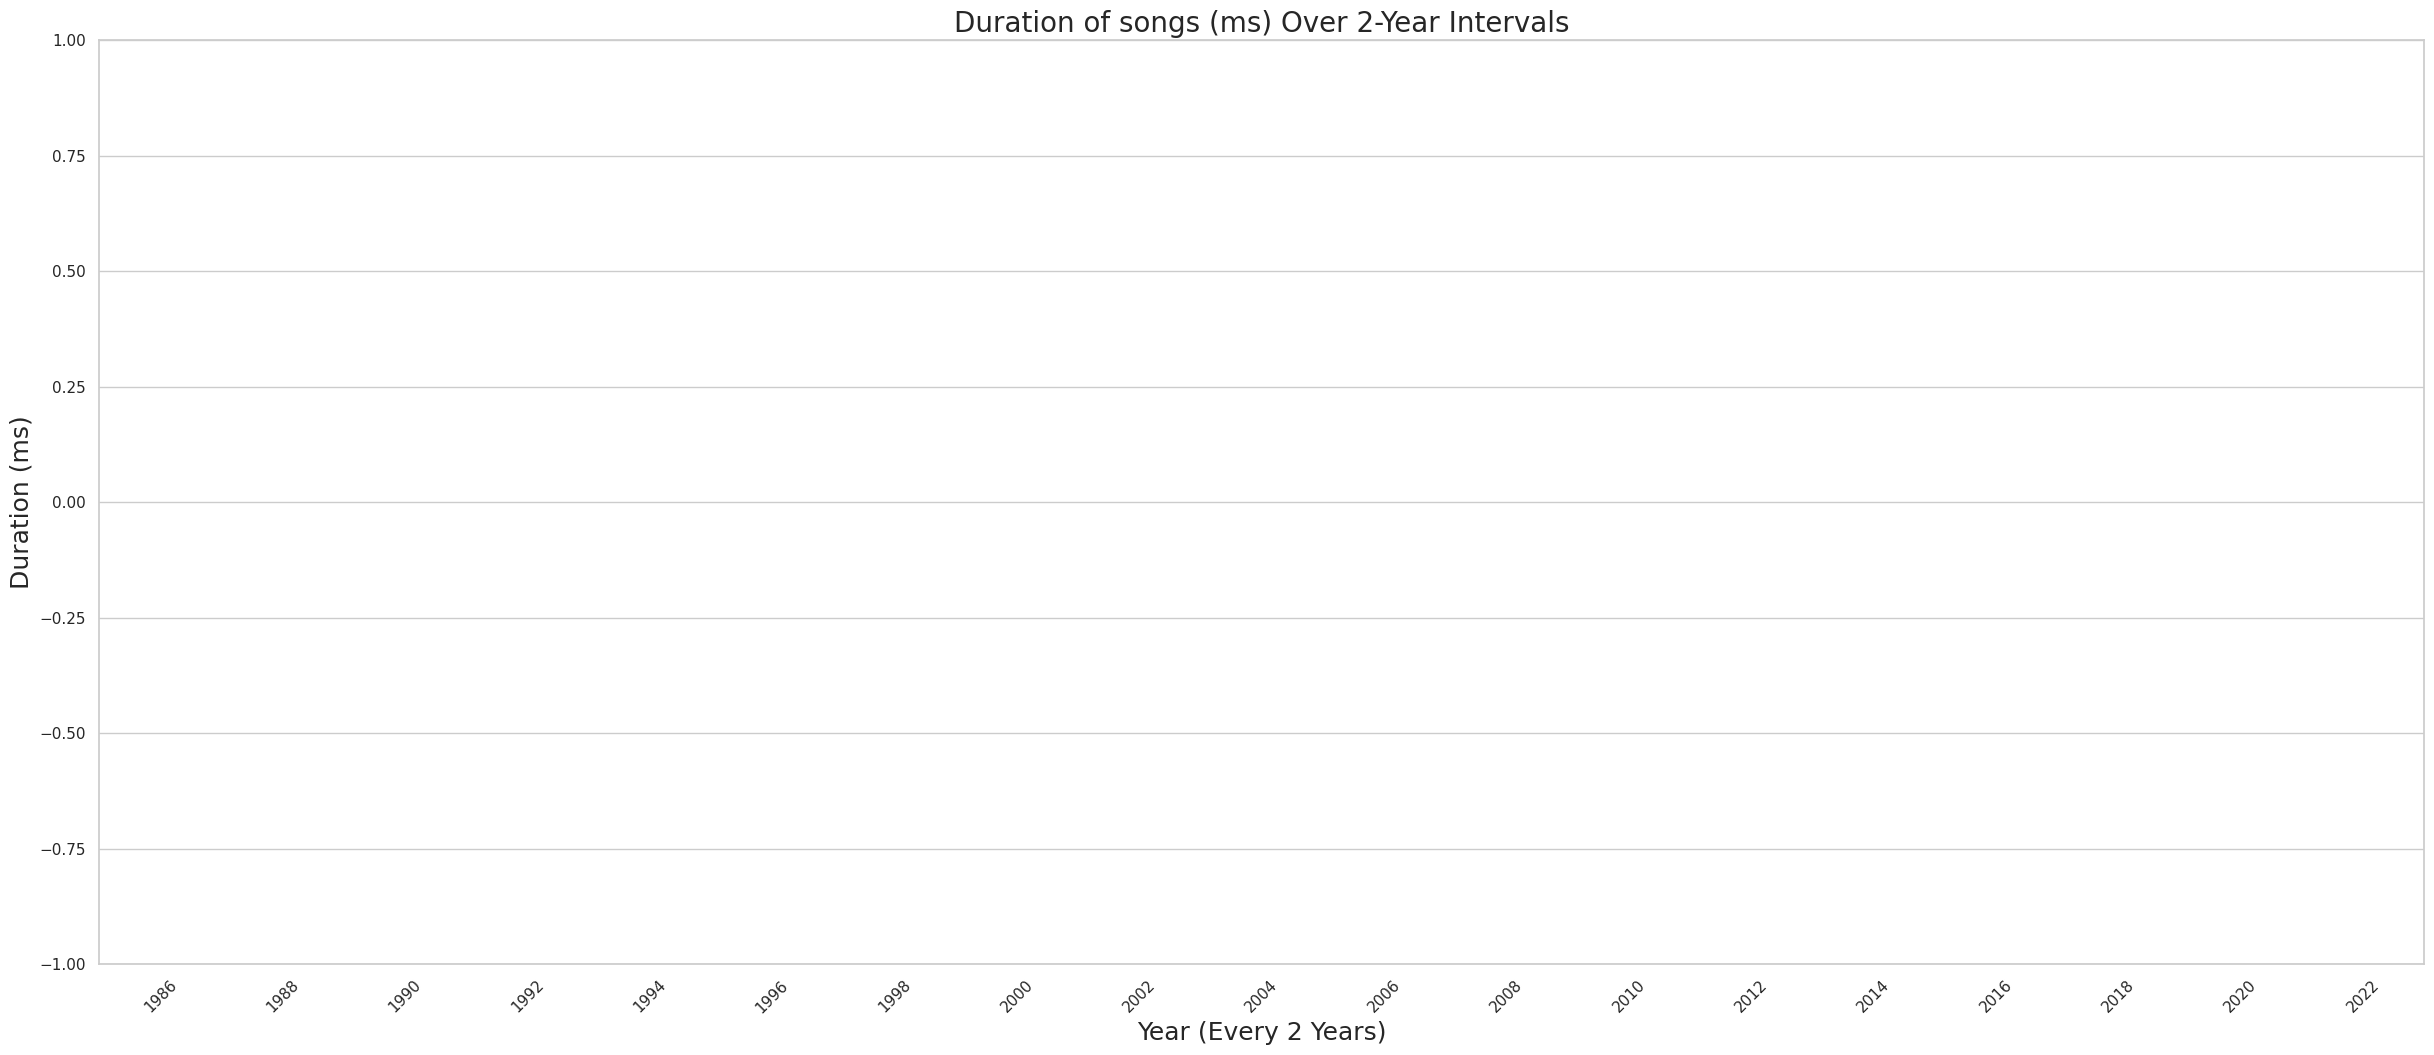

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="duration_ms", data=df)
min_value = -1  # Set the minimum value
max_value = 1  # Set the maximum value
plt.ylim(min_value, max_value)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Duration (ms)", size=18)
plt.title('Duration of songs (ms) Over 2-Year Intervals', size=20)
plt.show()

##### Tempo

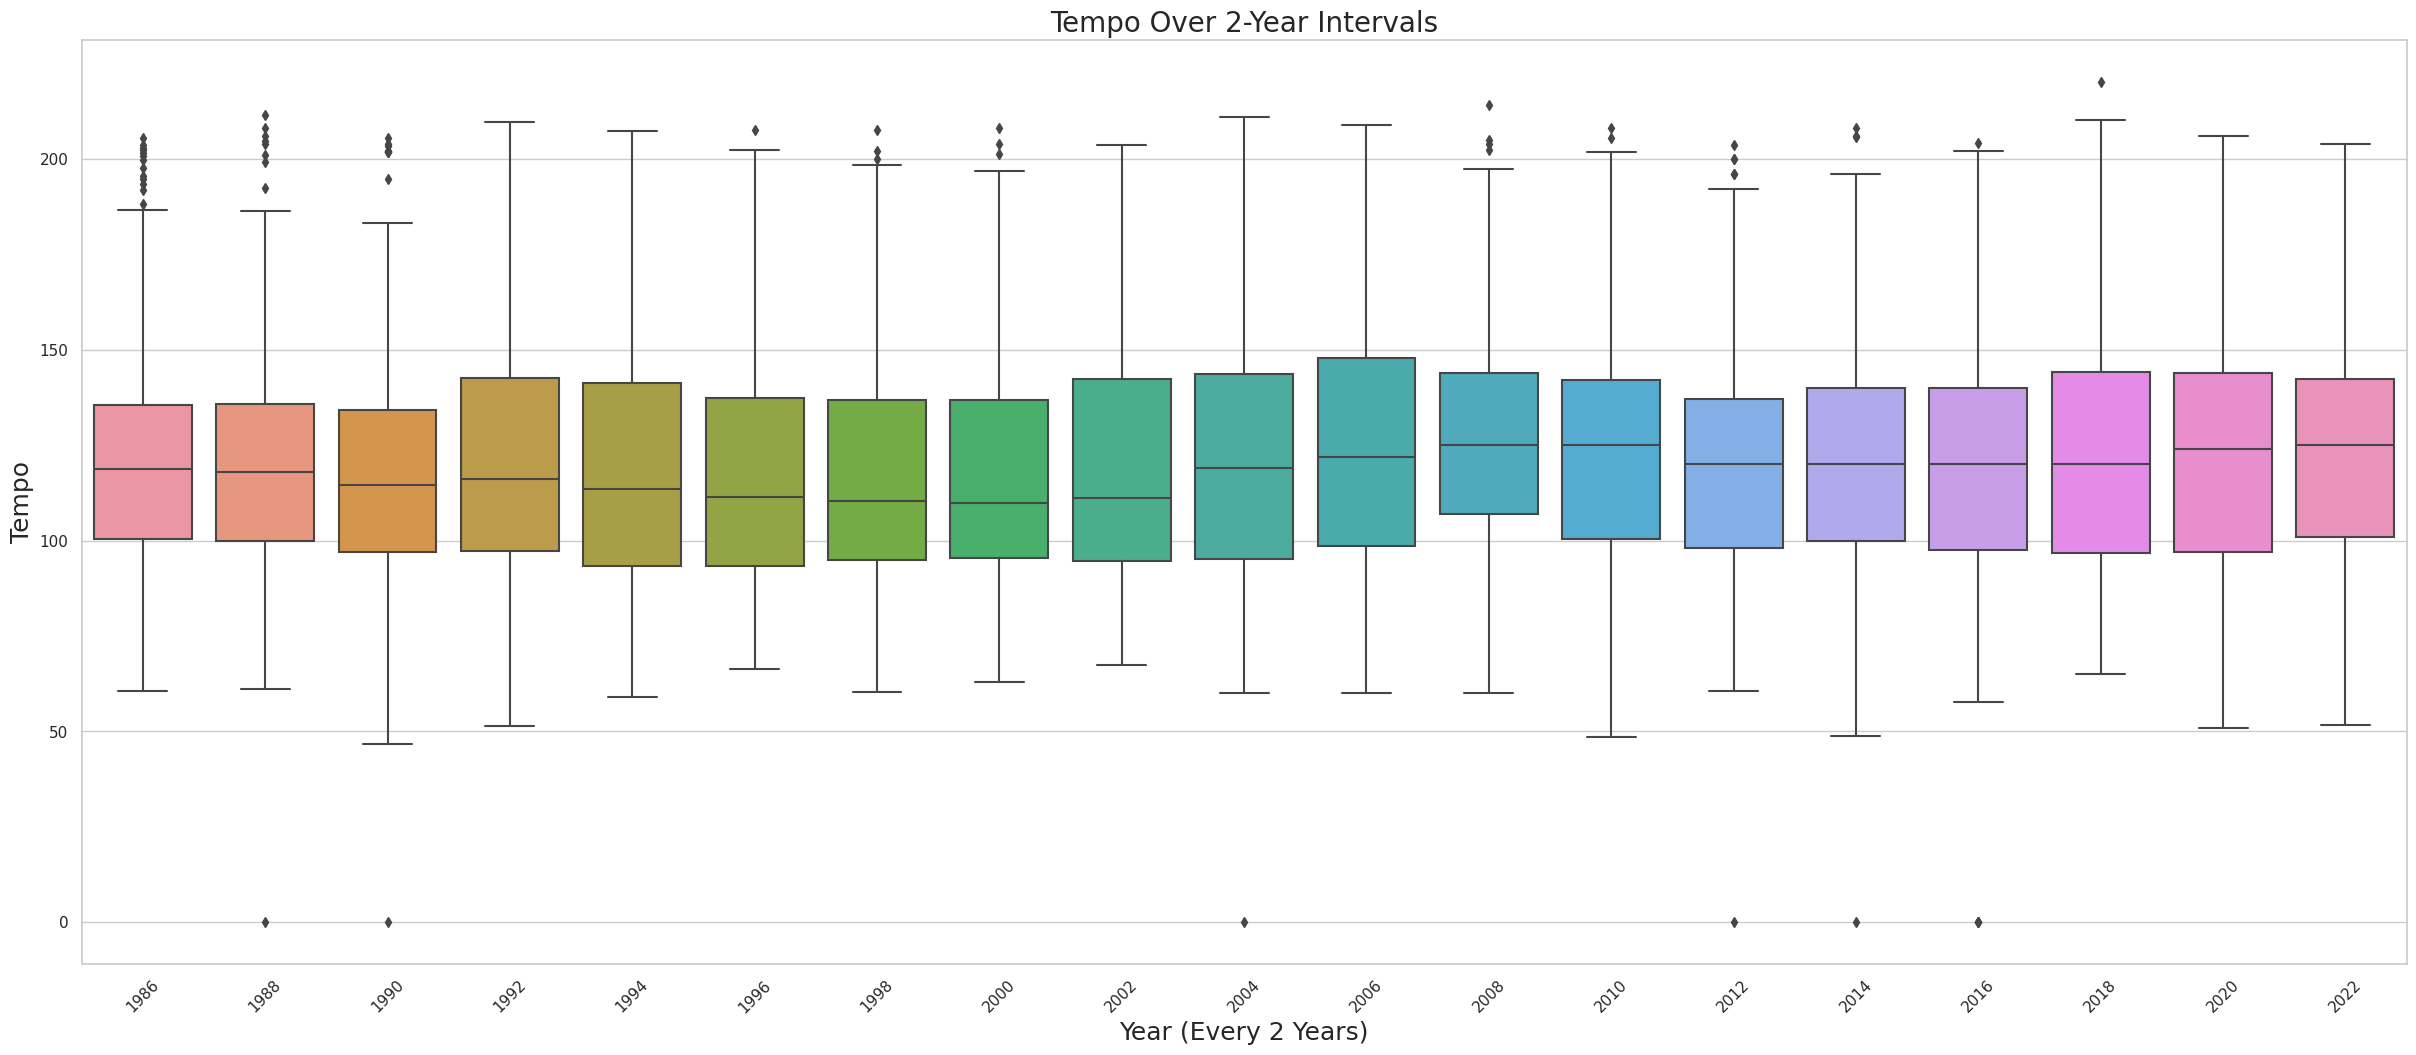

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="tempo", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Tempo", size=18)
plt.title('Tempo Over 2-Year Intervals', size=20)
plt.show()

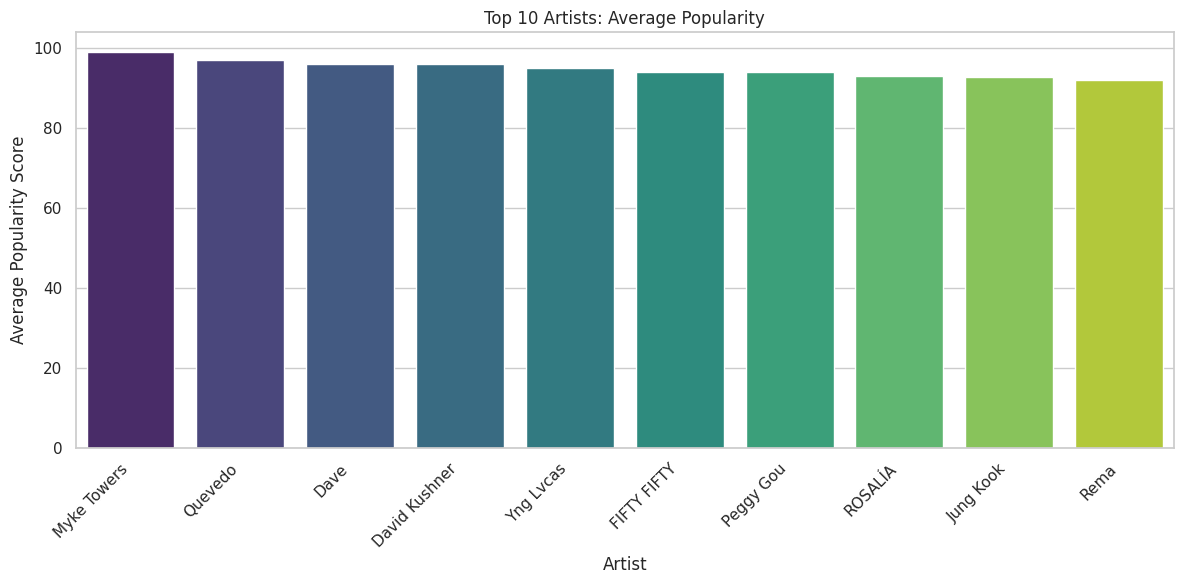

In [34]:
average_popularity_per_artist = df.groupby('principal_artist_name')['popularity'].mean().reset_index()

# 2. Pick the top 10 artists with the highest average popularity score
top10_artists = average_popularity_per_artist.nlargest(10, 'popularity')

# 3. Create a bar chart with different colors using Seaborn
plt.figure(figsize=(12, 6))
custom_colors = sns.color_palette("viridis", n_colors=len(top10_artists))
sns.barplot(x='principal_artist_name', y='popularity', data=top10_artists, palette=custom_colors)
plt.title('Top 10 Artists: Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()

# 4. Show the chart
plt.show()

### Multivariate Analysis

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
popularity,1.000000,0.102565,-0.010898,0.210559,-0.092412,0.055023,0.017471,-0.076843,-0.026988,-0.131195,0.009794,-0.156126,0.665320
danceability,0.102565,1.000000,-0.010037,0.113631,-0.093683,0.229350,-0.100741,-0.192523,-0.068566,0.429634,-0.159778,-0.107006,0.102015
energy,-0.010898,-0.010037,1.000000,0.706057,-0.065851,0.077926,-0.636531,-0.120807,0.166466,0.309813,0.159356,0.027095,-0.027831
loudness,0.210559,0.113631,0.706057,1.000000,-0.050317,0.090478,-0.484623,-0.321383,0.108930,0.174024,0.123373,-0.013479,0.279726
mode,-0.092412,-0.093683,-0.065851,-0.050317,1.000000,-0.130863,0.080110,-0.003353,-0.020415,0.002341,0.006057,-0.042076,-0.079011
speechiness,0.055023,0.229350,0.077926,0.090478,-0.130863,1.000000,-0.102046,-0.091642,0.109017,0.024919,0.046147,-0.019009,0.141723
acousticness,0.017471,-0.100741,-0.636531,-0.484623,0.080110,-0.102046,1.000000,0.125558,-0.099196,-0.135810,-0.104020,-0.114654,0.031784
instrumentalness,-0.076843,-0.192523,-0.120807,-0.321383,-0.003353,-0.091642,0.125558,1.000000,-0.032377,-0.153569,-0.043851,0.017803,-0.086813
liveness,-0.026988,-0.068566,0.166466,0.108930,-0.020415,0.109017,-0.099196,-0.032377,1.000000,0.015550,0.006292,-0.007327,-0.005515
valence,-0.131195,0.429634,0.309813,0.174024,0.002341,0.024919,-0.135810,-0.153569,0.015550,1.000000,0.056548,-0.142598,-0.204047


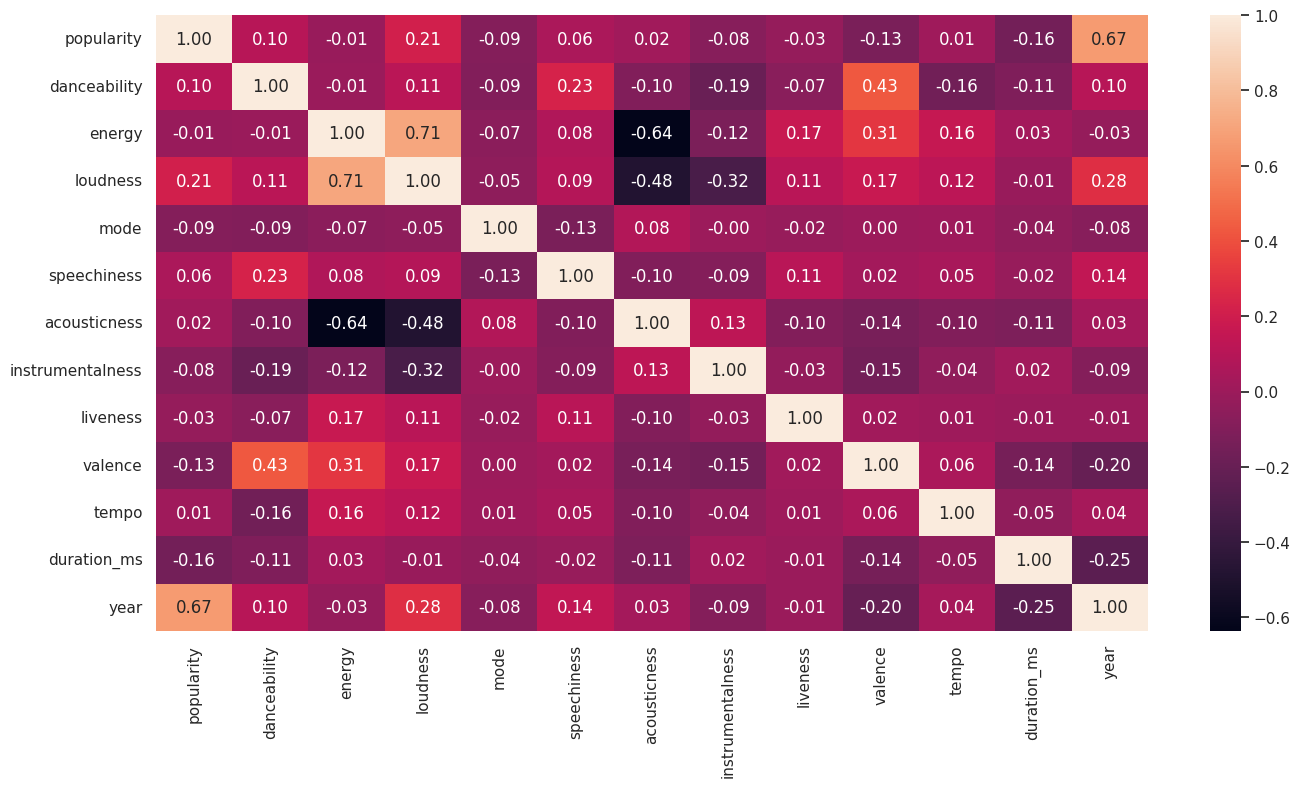

In [35]:
# Correlation matrix and heatmap between variables
data_norm_rev = df[['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','year']]
corr_matrix=data_norm_rev.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
corr_matrix

Highly correlated variables are displayed with light bright-orange colors. From the heatmap, we can discern a high positive correlation between loudness and energy, as well as popularity and year. We can also discern a high negative correlation between acousticness and energy. 

We will now proceed to graph how subjective musical characteristics have changed over the years represented in this dataset. To do this, let us first standardize all variables to be examined:

In [36]:
from sklearn.preprocessing import StandardScaler
musical_features_s = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness']
musical_features_o = ['tempo', 'duration_ms']
df3=df

scaler = StandardScaler()
df3[musical_features_s] = scaler.fit_transform(df3[musical_features_s])
df3[musical_features_o] = scaler.fit_transform(df3[musical_features_o])

In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

average_by_year = df3.groupby('year')[musical_features_s].mean().reset_index()
fig = make_subplots(rows=len(musical_features_s), cols=1, shared_xaxes=True, subplot_titles=musical_features_s)

for i, feature in enumerate(musical_features_s):
    trace = go.Scatter(x=average_by_year['year'], y=average_by_year[feature], mode='lines', name=feature)
    fig.add_trace(trace, row=i+1, col=1)

fig.update_layout(
    xaxis_title='Year',
    title=dict(text='Change in Subjective Musical Characteristics Over Time'),
    showlegend=False  
)

fig.show()

We can do the same for objective musical characteristics:

In [38]:
average_by_year = df3.groupby('year')[musical_features_o].mean().reset_index()
fig = px.line(average_by_year, x='year', y=musical_features_o)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Value',
    title=dict(text='Musical Features Over the Years')
)
fig.show()

##### Insights  


**Subjective Characteristics**
* Danceability, energy, and valence in songs have been increasing over recent years. Instrumentalness and liveness is at a relatively low level and decreasing. Speechiness has been high within the past ten years, but may also be decreasing. Valence has been relatively steady. 

**Objective Characteristics**
* There is a negative trend in duration and a positive trend in tempo. Songs with more recent release dates in our dataset are faster and shorter in duration than older songs. 
* We can make a few guesses about why this trend is present--is it the advent of social media and short-form platforms such as Tiktok that have made artists produce faster and shorter songs?

##### Notes

There are many outliers in several of our charts--this squishes the data and will make it difficult for us to model the data using the mean. Keep this in mind when moving forward with any time-series analyses or predictive models.

# Data Processing and Predictive Modeling

In [39]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import itertools

#LSTM modeling libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout

We create a new df with the median values of musical characteristics + popularity by year:

In [40]:
from functools import reduce

median_yrly_acousticness = df.groupby('year', as_index=False)['acousticness'].median()
median_yrly_danceability = df.groupby('year', as_index=False)['danceability'].median()
median_yrly_duration = df.groupby('year', as_index=False)['duration_ms'].median()
median_yrly_energy = df.groupby('year', as_index=False)['energy'].median()
median_yrly_loudness = df.groupby('year', as_index=False)['loudness'].median()
median_yrly_instrumentalness = df.groupby('year', as_index=False)['instrumentalness'].median()
median_yrly_liveness = df.groupby('year', as_index=False)['liveness'].median()
median_yrly_speechiness = df.groupby('year', as_index=False)['speechiness'].median()
median_yrly_tempo = df.groupby('year', as_index=False)['tempo'].median()
median_yrly_valence = df.groupby('year', as_index=False)['valence'].median()
median_yrly_popularity = df.groupby('year', as_index=False)['popularity'].median()


all_dfs = [median_yrly_acousticness,
               median_yrly_danceability,
               median_yrly_duration,
               median_yrly_energy,
               median_yrly_loudness,
               median_yrly_instrumentalness,
               median_yrly_liveness,
               median_yrly_speechiness,
               median_yrly_tempo,
               median_yrly_valence,
               median_yrly_popularity,
               yrly_key_mode]

yearly_df = reduce(lambda left,right: pd.merge(left,right,on=['year'],
                                            how='outer'), all_dfs)
yearly_df

,year,acousticness,danceability,duration_ms,energy,loudness,instrumentalness,liveness,speechiness,tempo,valence,popularity,key
0,1986,-0.469627,-0.165792,0.285300,0.108947,-9.9130,-0.272282,-0.461967,-0.522587,-0.078196,0.380957,57.0,0.0
1,1987,-0.435113,-0.075711,0.241781,0.065010,-9.7910,-0.272181,-0.399936,-0.536975,-0.075402,0.309422,58.0,7.0
2,1988,-0.489569,-0.050862,0.369751,0.089419,-10.0940,-0.272326,-0.441290,-0.508200,-0.126396,0.227669,57.0,7.0
3,1989,-0.089973,-0.007374,0.056051,-0.179088,-10.3230,-0.272424,-0.399936,-0.551895,-0.079394,0.464755,57.0,9.0
4,1990,-0.270213,-0.255873,0.247593,-0.164442,-9.4380,-0.272480,-0.427505,-0.531646,-0.153041,0.064161,59.0,7.0
5,1991,-0.272130,-0.106774,0.033871,-0.203498,-8.7980,-0.272623,-0.372366,-0.530047,-0.288625,0.090731,60.0,7.0
6,1992,-0.331571,-0.060180,0.101953,0.028395,-8.6230,-0.272232,-0.382705,-0.509266,-0.170604,0.383001,62.0,7.0
7,1993,-0.437031,0.200743,0.224252,-0.086331,-9.6535,-0.272537,-0.389597,-0.528449,-0.166829,0.301247,70.0,7.0
8,1994,-0.323901,-0.050862,0.226402,0.006426,-8.2440,-0.272579,-0.427505,-0.503937,-0.409008,0.223581,64.0,7.0
9,1995,-0.385260,0.185212,0.219126,0.055246,-7.9280,-0.272610,-0.393044,-0.494346,-0.082521,0.141827,63.0,0.0


In [41]:
#converting year column to datetime format
yearly_df['year'] = pd.to_datetime(yearly_df['year'], format='%Y')
yearly_df.set_index('year', inplace=True) 
yearly_df.head()

,acousticness,danceability,duration_ms,energy,loudness,instrumentalness,liveness,speechiness,tempo,valence,popularity,key
year,,,,,,,,,,,,
1986-01-01,-0.469627,-0.165792,0.285300,0.108947,-9.913,-0.272282,-0.461967,-0.522587,-0.078196,0.380957,57.0,0.0
1987-01-01,-0.435113,-0.075711,0.241781,0.065010,-9.791,-0.272181,-0.399936,-0.536975,-0.075402,0.309422,58.0,7.0
1988-01-01,-0.489569,-0.050862,0.369751,0.089419,-10.094,-0.272326,-0.441290,-0.508200,-0.126396,0.227669,57.0,7.0
1989-01-01,-0.089973,-0.007374,0.056051,-0.179088,-10.323,-0.272424,-0.399936,-0.551895,-0.079394,0.464755,57.0,9.0
1990-01-01,-0.270213,-0.255873,0.247593,-0.164442,-9.438,-0.272480,-0.427505,-0.531646,-0.153041,0.064161,59.0,7.0


##### Time series (NOT IN PROJECT, UNFINISHED)

In [42]:
train=yearly_df.acousticness[:90] # 90/100 = 90% split 
test=yearly_df.acousticness[90:]

In [43]:
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)